In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
from google.colab import drive
drive.mount('/content/drive')
#/home/ara2/Desktop/Najifa_Arif_CSE491/feature_matrix_updated.csv

ModuleNotFoundError: No module named 'google.colab'

## Loading Dataset

In [47]:
# Loading dataset
file_path = "/home/ara2/Desktop/Najifa_Arif_CSE491/feature_matrix_updated.csv"
df = pd.read_csv(file_path)
df.head()

,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_5,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1
0,scale_free_graph_m_21,15,38914,569787,0.000753,1447,29.284422,3,0,15,...,13.14,13.29,14.07,12.04,12.73750,2.33750,0.0,10.40,12.04,0.0
1,scale_free_graph_m_22,16,34571,531453,0.000889,1527,30.745596,3,0,16,...,10.30,9.60,12.06,11.25,10.83375,1.23375,0.0,9.60,9.91,0.0
2,scale_free_graph_m_23,17,21710,348197,0.001478,987,32.077107,3,0,17,...,10.78,10.35,11.56,10.17,10.87750,0.82750,0.0,10.05,10.17,0.0
3,scale_free_graph_m_24,18,427,6859,0.075414,212,32.126464,3,0,18,...,18.04,17.96,15.72,16.85,17.98250,2.26250,0.0,15.72,16.85,0.0
4,scale_free_graph_m_25_2nd_time,18,67449,1168793,0.000514,2260,34.657089,3,0,18,...,48.74,45.87,49.70,40.67,46.01125,5.34125,0.0,40.67,40.69,0.0


In [48]:
df.shape

(176, 27)

In [49]:
df.columns

Index(['grh_name(synthetic)', 'mxc_core', 'mxc_nodes', 'mxc_edges',
       'mxc_density', 'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
       'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'avg time',
       'avg-best time', 'time diff > 30', 'best time', '2nd best time',
       'time diff > 30.1'],
      dtype='object')

In [50]:
df.isna().sum()

grh_name(synthetic)    0
mxc_core               0
mxc_nodes              0
mxc_edges              0
mxc_density            0
mxc_max_degree         0
mxc_avg_degree         0
R                      0
min_core               0
degeneracy             0
upper_bound            0
edge                   0
sub_edge               0
time_1                 0
time_2                 0
time_3                 0
time_4                 0
time_5                 0
time_6                 0
time_7                 0
time_8                 0
avg time               0
avg-best time          0
time diff > 30         0
best time              0
2nd best time          0
time diff > 30.1       0
dtype: int64

## Generate Targate Columns

In [51]:
# # Made copy of original dataset
# df_targets = df.copy()

# # Initialize l=1 to l=8 columns with 0
# for i in range(1, 9):
#     df_targets[f"l={i}"] = 0.0

# # Applying logic row-wise, iterate through each row
# for index, row in df_targets.iterrows():

# # For the current row, it collects all 8 time values (time_1 to time_8) into a list time_values.
#     time_values = [row[f"time_{i}"] for i in range(1, 9)]
#     best_time = row["best time"]
#     second_best_time = row["2nd best time"]


#     best_idx = time_values.index(best_time)  # 0-based
#     df_targets.at[index, f"l={best_idx + 1}"] = 1  # Set best as 1

#     # Handle second best if different from best
#     if best_time != second_best_time:
#         try:
#             second_idx = time_values.index(second_best_time)
#             ratio = best_time / second_best_time
#             df_targets.at[index, f"l={second_idx + 1}"] = ratio
#         except ValueError:
#             pass  # If second best not found in time_1 to time_8


# # Ensure pandas displays all rows and columns in the output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Display the full DataFrame with all columns
# df_targets

In [52]:
# # Make a copy of the original dataset
# df_targets = df.copy()

# # Initialize l=1 to l=8 columns
# for i in range(1, 9):
#     df_targets[f"l={i}"] = None  # set to None instead of 0.0

# # Apply logic row-wise
# for index, row in df_targets.iterrows():
#     # Extract the 8 time values for the current row
#     time_values = [row[f"time_{i}"] for i in range(1, 9)]
#     best_time = row["best time"]

#     for i, time_val in enumerate(time_values):  # i from 0 to 7
#         col_name = f"l={i + 1}"

#         if time_val == best_time:
#             df_targets.at[index, col_name] = 1.0  # Best time → 1
#         else:
#             try:
#                 df_targets.at[index, col_name] = round(best_time / time_val, 3)  # Normalize others
#             except ZeroDivisionError:
#                 df_targets.at[index, col_name] = None  # Avoid divide-by-zero

# # Display all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Show the full dataset
# df_targets

## Train-Test Split && Model Apply

In [53]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor
# from sklearn.tree import DecisionTreeRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from sklearn.svm import SVR

In [54]:
# # Define input and output
# feature_cols = ['R', 'min_core', 'degeneracy', 'upper_bound',
#                 'edge', 'sub_edge']
# results_summary = []  # For showing best model of corresponding l order along with R^2 score

# # Loop through each l target column, l= 1 ....8
# for i in range(1, 9):

#     print(f"\n Training models to predict: l={i}")

#     X = df_targets[feature_cols].fillna(0)  # replace all NaN with 0
#     y = df_targets[f"l={i}"]

#     # Train-test split 80:20
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#     models = {
#         "Decision Tree": DecisionTreeRegressor(),
#         "Random Forest": RandomForestRegressor(),
#         "XGBoost": XGBRegressor(),
#         "Linear Regression": LinearRegression(),
#         "SVM": SVR(),
#         #"MLP": MLPRegressor(max_iter=1000)
#     }

#     best_model = None
#     best_r2 = -float('inf')

#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         r2 = r2_score(y_test, y_pred)
#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)

#         print(f"{name}:\n  R²  = {r2:.4f}\n  MAE = {mae:.4f}\n  MSE = {mse:.4f}")

#         if r2 > best_r2:
#             best_r2 = r2
#             best_model = name

#     print(f" Best model for l={i}: {best_model} with R² = {best_r2:.4f}")
#     results_summary.append({
#       "l": f"l={i}",
#       "Best Model": best_model,
#       "R² Score": round(best_r2, 4)
#   })

In [55]:
# summary_df = pd.DataFrame(results_summary)
# display(summary_df)

##Hyperparameter Tuning

In [56]:
# from sklearn.model_selection import train_test_split, GridSearchCV

In [57]:
# # Define hyperparameter grids
# param_grids = {
#     "Decision Tree": {
#         "max_depth": [3, 5, 10, None],
#         "min_samples_split": [2, 5, 10]
#     },
#     "Random Forest": {
#         "n_estimators": [50, 100],
#         "max_depth": [5, 10, None],
#         "min_samples_split": [2, 5]
#     },
#     "XGBoost": {
#         "n_estimators": [50, 100],
#         "max_depth": [3, 5, 7],
#         "learning_rate": [0.05, 0.1]
#     },
#     "SVM": {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "rbf"]
#     },
#     "MLP": {
#         "hidden_layer_sizes": [(50,), (100,)],
#         "activation": ["relu", "tanh"],
#         "solver": ["adam"],
#         "max_iter": [1000]
#     }
# }

In [58]:
# # Models without hyperparameters (baseline)
# base_models = {
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "XGBoost": XGBRegressor(),
#     "Linear Regression": LinearRegression(),  # No tuning
#     "SVM": SVR(),
#     "MLP": MLPRegressor()
# }

# # Loop through each l target column, l=1 to l=8
# for i in range(1, 9):
#     print(f"\n Training models with hyperparameter tuning for: l={i}")

#     X = df_targets[feature_cols].fillna(0)
#     y = df_targets[f"l={i}"]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#     best_model_name = None
#     best_r2 = -float('inf')

#     for model_name, model in base_models.items():
#         print(f"\nModel: {model_name}")
#         if model_name == "Linear Regression":
#             # No tuning
#             model.fit(X_train, y_train)
#             best_estimator = model
#         else:
#             grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring="r2", n_jobs=-1)
#             grid.fit(X_train, y_train)
#             best_estimator = grid.best_estimator_
#             print(f"  Best Params: {grid.best_params_}")

#         y_pred = best_estimator.predict(X_test)
#         r2 = r2_score(y_test, y_pred)
#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)

#         print(f"  R²  = {r2:.4f}\n  MAE = {mae:.4f}\n  MSE = {mse:.4f}")

#         if r2 > best_r2:
#             best_r2 = r2
#             best_model_name = model_name

#     print(f"\n Best model for l={i}: {best_model_name} with R² = {best_r2:.4f}")
#     results_summary.append({
#         "l": f"l={i}",
#         "Best Model": best_model_name,
#         "R² Score": round(best_r2, 4)
#     })


In [59]:
# summary_df = pd.DataFrame(results_summary)
# display(summary_df)

<h3>Multi-Class Classification</h3>

In [60]:
# Making copy of original dataset and generating best label as target
df_class = df.copy()

def best_ordering(row):
    subset = {f"l={i}": row[f"time_{i}"] for i in range(5, 9)}  # times for l=5..8
    return min(subset, key=subset.get).replace("l=", "")  # e.g., "5"

df_class["best_label"] = df_class.apply(best_ordering, axis=1).astype(int)

In [61]:
df_class.head(10)

,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1,best_label
0,scale_free_graph_m_21,15,38914,569787,0.000753,1447,29.284422,3,0,15,...,13.29,14.07,12.04,12.73750,2.33750,0.0,10.40,12.04,0.0,8
1,scale_free_graph_m_22,16,34571,531453,0.000889,1527,30.745596,3,0,16,...,9.60,12.06,11.25,10.83375,1.23375,0.0,9.60,9.91,0.0,6
2,scale_free_graph_m_23,17,21710,348197,0.001478,987,32.077107,3,0,17,...,10.35,11.56,10.17,10.87750,0.82750,0.0,10.05,10.17,0.0,8
3,scale_free_graph_m_24,18,427,6859,0.075414,212,32.126464,3,0,18,...,17.96,15.72,16.85,17.98250,2.26250,0.0,15.72,16.85,0.0,7
4,scale_free_graph_m_25_2nd_time,18,67449,1168793,0.000514,2260,34.657089,3,0,18,...,45.87,49.70,40.67,46.01125,5.34125,0.0,40.67,40.69,0.0,8
5,scale_free_graph_m_26_2nd_time,19,45855,824742,0.000784,1985,35.971737,3,0,19,...,45.91,44.30,44.79,44.40000,7.78000,0.0,36.62,44.30,0.0,7
6,scale_free_graph_m_26,19,25611,461896,0.001408,1097,36.070126,3,0,19,...,19.54,21.68,18.20,20.16125,1.96125,0.0,18.20,19.16,0.0,8
7,scale_free_graph_m_27_2nd_time,20,1232,22578,0.029775,270,36.652597,3,0,20,...,62.26,62.44,65.50,63.33375,2.88375,0.0,60.45,60.52,0.0,5
8,scale_free_graph_m_27,20,1327,24564,0.027920,294,37.021854,3,0,20,...,23.93,24.30,24.41,24.09625,1.98625,0.0,22.11,23.61,0.0,5
9,scale_free_graph_m_28_2nd_time,20,69217,1337886,0.000559,2170,38.657729,3,0,20,...,43.69,50.48,47.59,46.83875,5.60875,0.0,41.23,43.69,0.0,6


In [62]:
df_class.columns

Index(['grh_name(synthetic)', 'mxc_core', 'mxc_nodes', 'mxc_edges',
       'mxc_density', 'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
       'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'avg time',
       'avg-best time', 'time diff > 30', 'best time', '2nd best time',
       'time diff > 30.1', 'best_label'],
      dtype='object')

In [63]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC



ModuleNotFoundError: No module named 'xgboost'

In [66]:
df_class.loc[145]

grh_name(synthetic)    small_world_graph_m_50_1_p_0.24_n_412595_5th_time
mxc_core                                                              41
mxc_nodes                                                         412085
mxc_edges                                                       10294669
mxc_density                                                     0.000121
mxc_max_degree                                                        67
mxc_avg_degree                                                 49.963813
R                                                                      3
min_core                                                               0
degeneracy                                                            41
upper_bound                                                           91
edge                                                            10314875
sub_edge                                                        10314875
time_1                                             

In [67]:
synth_df=df_class.loc[:145]
synth_df.tail()

,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1,best_label
141,scale_free_graph_m_45_1_n_438981_5th_time,31,164550,5035861,0.000372,4705,61.207669,3,0,31,...,15908.16,16848.62,15895.10,16380.97750,558.43750,558.43750,15822.54,15874.34,51.80,8
142,scale_free_graph_m_46_1_n_343744_5th_time,32,118162,3702817,0.000530,3680,62.673567,3,0,32,...,25690.00,26418.03,25652.94,28837.33125,3184.39125,3184.39125,25652.94,25690.00,37.06,8
143,small_world_graph_m_46_1_p_0.27_n_413968_5th_time,37,413502,9504664,0.000111,62,45.971550,3,0,37,...,11115.82,11017.23,11197.61,11099.73500,86.01500,86.01500,11013.72,11017.23,0.00,7
144,small_world_graph_m_47_1_p_0.28_n_409896_5th_time,37,409280,9405673,0.000112,65,45.962046,3,0,37,...,7175.58,7244.35,7140.41,7190.83000,51.79000,51.79000,7139.04,7140.41,0.00,5
145,small_world_graph_m_50_1_p_0.24_n_412595_5th_time,41,412085,10294669,0.000121,67,49.963813,3,0,41,...,75360.75,64787.00,62623.63,73358.72500,10735.09500,10735.09500,62623.63,64787.00,2163.37,8


In [68]:
synth_df.shape

(146, 28)

In [69]:
real_df = df_class.loc[146:]
real_df.tail()

,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1,best_label
171,out_dimacs10-cond-mat-2003_cleaned_LCC_remapped,24,25,300,1.000000,24,24.000000,3,0,24,...,11631.08,12347.80,11870.33,11830.92000,310.92000,310.920,11520.00,11616.87,96.87,6
172,out_douban_cleaned_LCC_remapped,15,1857,25213,0.014631,152,27.154550,3,0,15,...,1.18,1.23,1.20,1.17250,0.16250,0.000,1.01,1.13,0.00,6
173,out_petster-hamster_cleaned_LCC_remapped,24,25,300,1.000000,24,24.000000,3,0,24,...,3700.79,3530.51,3695.68,3683.96500,153.45500,153.455,3530.51,3678.34,147.83,7
174,out_sociopatterns-infectious_cleaned_LCC_remapped,17,32,351,0.707661,28,21.937500,3,0,17,...,1.66,1.44,1.64,1.63250,0.20250,0.000,1.43,1.44,0.00,7
175,soc-political-retweet_LCC_remapped,18,193,2990,0.161377,94,30.984456,3,0,18,...,0.37,0.37,0.36,0.37125,0.01125,0.000,0.36,0.36,0.00,8


In [70]:
real_train, real_test = train_test_split(
        real_df,
        test_size=0.4,
        random_state = 20,
        stratify = real_df['best_label']
)

In [71]:
print("Real Train Instances:")
display(real_train)

print("\nReal Test Instances:")
display(real_test)


Real Train Instances:


,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1,best_label
153,OHSU_LCC_remapped,12,27,232,0.660969,24,17.185185,3,0,12,...,0.12,0.11,0.12,0.11375,0.00375,0.00000,0.11,0.11,0.00,7
167,oregon1_010331_cleaned_LCC_remapped,17,32,379,0.764113,31,23.687500,3,0,17,...,468.15,475.40,470.97,479.66875,16.88875,0.00000,462.78,468.15,0.00,6
147,3D_28984_Tetra_LCC_remapped,14,27616,275544,0.000723,3816,19.955388,3,0,14,...,22.94,21.42,23.14,22.02250,1.08250,0.00000,20.94,21.28,0.00,5
162,email-EU_LCC_remapped,22,128,2290,0.281742,79,35.781250,3,0,22,...,22.48,23.66,22.50,22.82000,0.50000,0.00000,22.32,22.48,0.00,6
151,CA-HepTh_cleaned_LCC_remapped,31,32,496,1.000000,31,31.000000,3,0,31,...,17886.57,17842.63,17573.77,17704.33750,355.18750,355.18750,17349.15,17573.77,224.62,5
164,ia-dbpedia-team-bi_LCC_remapped,9,903,6924,0.017002,158,15.335548,3,0,9,...,3.18,3.11,3.17,3.15875,0.04875,0.00000,3.11,3.15,0.00,7
175,soc-political-retweet_LCC_remapped,18,193,2990,0.161377,94,30.984456,3,0,18,...,0.37,0.37,0.36,0.37125,0.01125,0.00000,0.36,0.36,0.00,8
146,176bit_LCC_remapped,12,6703,74356,0.003310,3810,22.185887,3,0,12,...,7.07,7.30,7.05,7.17125,0.28125,0.00000,6.89,6.96,0.00,8
172,out_douban_cleaned_LCC_remapped,15,1857,25213,0.014631,152,27.154550,3,0,15,...,1.18,1.23,1.20,1.17250,0.16250,0.00000,1.01,1.13,0.00,6
149,AIDS_LCC_remapped,2,65,74,0.035577,3,2.276923,3,0,2,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.00,0.00,0.00,5



Real Test Instances:


,grh_name(synthetic),mxc_core,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,R,min_core,degeneracy,...,time_6,time_7,time_8,avg time,avg-best time,time diff > 30,best time,2nd best time,time diff > 30.1,best_label
150,CA-CondMat_cleaned_LCC_remapped,25,26,325,1.000000,25,25.000000,3,0,25,...,2552.14,2595.44,2598.67,2587.55750,57.29750,57.29750,2530.26,2552.14,0.00,6
157,ca-CondMat_LCC_remapped,25,26,325,1.000000,25,25.000000,3,0,25,...,2585.99,2637.83,2620.62,2557.23875,82.21875,82.21875,2475.02,2492.36,0.00,5
169,oregon1_010526_cleaned_LCC_remapped,17,30,336,0.772414,28,22.400000,3,0,17,...,235.41,224.83,222.80,228.41125,19.88125,0.00000,208.53,222.80,0.00,8
168,oregon1_010407_cleaned_LCC_remapped,15,34,372,0.663102,32,21.882353,3,0,15,...,35.58,46.98,44.27,43.29625,7.71625,0.00000,35.58,39.58,0.00,6
159,cit-DBLP_LCC_remapped,12,916,9840,0.023481,219,21.484716,3,0,12,...,0.45,0.41,0.51,0.48250,0.07250,0.00000,0.41,0.45,0.00,7
171,out_dimacs10-cond-mat-2003_cleaned_LCC_remapped,24,25,300,1.000000,24,24.000000,3,0,24,...,11631.08,12347.80,11870.33,11830.92000,310.92000,310.92000,11520.00,11616.87,96.87,6
154,as20000102_cleaned_LCC_remapped,12,21,163,0.776190,20,15.523810,3,0,12,...,1.44,1.32,1.32,1.41750,0.09750,0.00000,1.32,1.32,0.00,7
163,escorts_LCC_remapped,11,341,3386,0.058410,95,19.859238,3,0,11,...,0.06,0.06,0.05,0.05750,0.00750,0.00000,0.05,0.05,0.00,8
152,CL-10K-1d8-L5_LCC_remapped,21,264,4369,0.125850,70,33.098485,3,0,21,...,0.22,0.21,0.22,0.20125,0.04125,0.00000,0.16,0.18,0.00,5
155,bio-grid-fruitfly_LCC_remapped,12,47,381,0.352451,26,16.212766,3,0,12,...,0.03,0.03,0.03,0.03000,0.00000,0.00000,0.03,0.03,0.00,5


In [72]:
train_df = pd.concat([synth_df,real_train], ignore_index = True)
# Test set is 40% of real graphs only
test_df = real_test.copy()

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (164, 28)
Testing set shape: (12, 28)


In [73]:
feature_cols = ['mxc_nodes', 'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
                'degeneracy', 'upper_bound', 'edge', 'sub_edge']

X_train = train_df[feature_cols]
y_train = train_df['best_label']

X_test = test_df[feature_cols]
y_test = test_df['best_label']

In [74]:
# Encode labels if needed
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [75]:
# real_graphs ={
#     "176bit_LCC_remapped","3D_28984_Tetra_LCC_remapped","598a_LCC_remapped",
#     "AIDS_LCC_remapped","CA-CondMat_cleaned_LCC_remapped","CA-HepTh_cleaned_LCC_remapped",
#     "CL-10K-1d8-L5_LCC_remapped","OHSU_LCC_remapped","as20000102_cleaned_LCC_remapped",
#     "bio-grid-fruitfly_LCC_remapped","bio-grid-human_LCC_remapped","ca-CondMat_LCC_remapped",
#     "ca-MathSciNet_LCC_remapped","cit-DBLP_LCC_remapped","com-amazon_ungraph_cleaned_LCC_remapped",
#     "econ-poli-large_LCC_remapped","email-EU_LCC_remapped","escorts_LCC_remapped","ia-dbpedia-team-bi_LCC_remapped",
#     "ia-email-EU_LCC_remapped","ia-escorts-dynamic_LCC_remapped","oregon1_010331_cleaned_LCC_remapped",
#     "oregon1_010407_cleaned_LCC_remapped","oregon1_010526_cleaned_LCC_remapped","out_dimacs10-as22july06_cleaned_LCC_remapped",
#     "out_dimacs10-cond-mat-2003_cleaned_LCC_remapped","out_douban_cleaned_LCC_remapped","out_petster-hamster_cleaned_LCC_remapped",
#     "out_sociopatterns-infectious_cleaned_LCC_remapped","soc-political-retweet_LCC_remapped"}

# # df_class["graph_type"] = df_class["grh_name(synthetic)"].apply(
# #     lambda x: "real" if x in real_graphs else "synthetic"
# # )

# # Then test set = only real graphs
# X_test = X[df_class["grh_name(synthetic)"].isin(real_graphs)]
# y_test = df_class.loc[df_class["grh_name(synthetic)"].isin(real_graphs), 'best_label']
# # Encode labels if needed
# le = LabelEncoder()
# y_train_enc = le.fit_transform(y_train)
# y_test_enc = le.transform(y_test)

In [76]:
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Linear SVM": LinearSVC(max_iter=5000),  # linear kernel
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "CatBoost": CatBoostClassifier(verbose=0)
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train, y_train_bin)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })



Decision Tree Report for l=5:
              precision    recall  f1-score   support

           0     0.7000    0.7778    0.7368         9
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.5833        12
   macro avg     0.3500    0.3889    0.3684        12
weighted avg     0.5250    0.5833    0.5526        12


Random Forest Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.8889    0.8000         9
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.6667        12
   macro avg     0.3636    0.4444    0.4000        12
weighted avg     0.5455    0.6667    0.6000        12


SVM Report for l=5:
              precision    recall  f1-score   support

           0     0.7500    1.0000    0.8571         9
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.7500        12
   macro avg     0.3750    0.5000    0.4286  

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


CatBoost Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.8889    0.8000         9
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.6667        12
   macro avg     0.3636    0.4444    0.4000        12
weighted avg     0.5455    0.6667    0.6000        12


Decision Tree Report for l=6:
              precision    recall  f1-score   support

           0     0.7143    0.6250    0.6667         8
           1     0.4000    0.5000    0.4444         4

    accuracy                         0.5833        12
   macro avg     0.5571    0.5625    0.5556        12
weighted avg     0.6095    0.5833    0.5926        12


Random Forest Report for l=6:
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889         8
           1     1.0000    0.5000    0.6667         4

    accuracy                         0.8333        12
   macro avg     0.9000    0.7500    0.7

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


CatBoost Report for l=6:
              precision    recall  f1-score   support

           0     0.7273    1.0000    0.8421         8
           1     1.0000    0.2500    0.4000         4

    accuracy                         0.7500        12
   macro avg     0.8636    0.6250    0.6211        12
weighted avg     0.8182    0.7500    0.6947        12


Decision Tree Report for l=7:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    1.0000    1.0000         3

    accuracy                         1.0000        12
   macro avg     1.0000    1.0000    1.0000        12
weighted avg     1.0000    1.0000    1.0000        12


Random Forest Report for l=7:
              precision    recall  f1-score   support

           0     0.9000    1.0000    0.9474         9
           1     1.0000    0.6667    0.8000         3

    accuracy                         0.9167        12
   macro avg     0.9500    0.8333    0.8

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


CatBoost Report for l=7:
              precision    recall  f1-score   support

           0     0.8182    1.0000    0.9000         9
           1     1.0000    0.3333    0.5000         3

    accuracy                         0.8333        12
   macro avg     0.9091    0.6667    0.7000        12
weighted avg     0.8636    0.8333    0.8000        12


Decision Tree Report for l=8:
              precision    recall  f1-score   support

           0     0.8182    0.9000    0.8571        10
           1     0.0000    0.0000    0.0000         2

    accuracy                         0.7500        12
   macro avg     0.4091    0.4500    0.4286        12
weighted avg     0.6818    0.7500    0.7143        12


Random Forest Report for l=8:
              precision    recall  f1-score   support

           0     0.8333    1.0000    0.9091        10
           1     0.0000    0.0000    0.0000         2

    accuracy                         0.8333        12
   macro avg     0.4167    0.5000    0.4

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


CatBoost Report for l=8:
              precision    recall  f1-score   support

           0     0.8333    1.0000    0.9091        10
           1     0.0000    0.0000    0.0000         2

    accuracy                         0.8333        12
   macro avg     0.4167    0.5000    0.4545        12
weighted avg     0.6944    0.8333    0.7576        12



/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [77]:
# Convert to DataFrame for summary table
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l)     Best Model  Accuracy  F1-score
0             5            KNN  0.833333  0.500000
1             6  Random Forest  0.833333  0.666667
2             7  Decision Tree  1.000000  1.000000
3             8  Random Forest  0.833333  0.000000


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define hyperparameter grids
param_grids = {
    "Decision Tree": {"max_depth": [None, 5, 10, 20], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["rbf", "poly"], "gamma": ["scale", "auto"]},
    "Linear SVM": {"C": [0.01, 0.1, 1, 10]},
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "KNN": {"n_neighbors": [3, 5, 7, 9]},
    "CatBoost": {"depth": [4, 6, 8], "learning_rate": [0.01, 0.1], "iterations": [200, 500]}
}
best_models = []

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():

        # Use a tuned model name
        tuned_name = f"Tuned {name}"

        grid = GridSearchCV(
            model, 
            param_grids.get(name, {}), 
            cv=3, scoring='accuracy',
            n_jobs = 20
        )
        grid.fit(X_train, y_train_bin)
        best_estimator = grid.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} (Best Params: {grid.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

In [ ]:
# Summary table
summary_df = pd.DataFrame(best_models)
print("\n===== Summary Table after Hyperparameter Tuning =====")
print(summary_df)

# Final_feature_matrix

In [ ]:
!conda install "numpy<2" -y

In [ ]:
!conda install numpy<2 matplotlib pandas seaborn --force-reinstall


In [78]:
import numpy as np
print(np.__version__)

1.26.4


In [79]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

In [80]:
# Loading dataset
file_path = "/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
df = pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [81]:
df.shape

(226, 28)

In [82]:
df.columns

Index(['grh_name(synthetic)', 'std_degree', 'std_core', 'avg_core', 'nodes',
       'density', 'max_degree', 'avg_degree', 'mxc_std_degree', 'mxc_nodes',
       'mxc_edges', 'mxc_density', 'mxc_max_degree', 'mxc_avg_degree', 'R',
       'min_core', 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'time_1',
       'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8'],
      dtype='object')

In [83]:
# Making copy of original dataset and generating best label as target
df_class = df.copy()

def best_ordering(row):
    subset = {f"l={i}": row[f"time_{i}"] for i in range(5, 9)}  # times for l=5..8
    return min(subset, key=subset.get).replace("l=", "")  # e.g., "5"

df_class["best_label"] = df_class.apply(best_ordering, axis=1).astype(int)

In [84]:
df_class.head(10)

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1094751,13.46,13.23,10.40,12.27,13.14,13.29,14.07,12.04,8
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1149598,10.31,9.91,11.60,11.64,10.30,9.60,12.06,11.25,6
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1198092,11.63,10.05,11.17,11.31,10.78,10.35,11.56,10.17,8
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1247617,18.92,18.96,19.78,17.63,18.04,17.96,15.72,16.85,7
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2595685,46.72,40.69,47.48,48.22,48.74,45.87,49.70,40.67,8
5,scale_free_graph_m_26_2nd_time,44.568665,5.607271,13.806041,200001,0.000135,3503,26.94960,43.980601,45855,...,2689822,45.98,45.67,36.62,45.69,46.24,45.91,44.30,44.79,7
6,scale_free_graph_m_26,41.454035,5.624368,13.847832,100001,0.000270,1865,27.01038,40.402149,25611,...,1347931,19.16,20.21,20.79,20.09,21.62,19.54,21.68,18.20,8
7,scale_free_graph_m_27_2nd_time,45.588266,5.714003,14.207314,200001,0.000140,2828,28.00259,27.865798,1232,...,2795242,65.35,66.23,60.45,63.92,60.52,62.26,62.44,65.50,5
8,scale_free_graph_m_27,43.512375,5.732678,14.169638,100001,0.000279,2197,27.89694,28.047413,1327,...,1392265,26.20,24.29,23.61,22.11,23.92,23.93,24.30,24.41,5
9,scale_free_graph_m_28_2nd_time,46.805573,6.002898,14.801901,200001,0.000145,3199,28.99089,47.521445,69217,...,2894363,44.51,47.73,41.23,46.98,52.50,43.69,50.48,47.59,6


In [85]:
df_class.columns

Index(['grh_name(synthetic)', 'std_degree', 'std_core', 'avg_core', 'nodes',
       'density', 'max_degree', 'avg_degree', 'mxc_std_degree', 'mxc_nodes',
       'mxc_edges', 'mxc_density', 'mxc_max_degree', 'mxc_avg_degree', 'R',
       'min_core', 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'time_1',
       'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8',
       'best_label'],
      dtype='object')

In [86]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [88]:
df_class.loc[146]

grh_name(synthetic)    176bit_LCC_remapped
std_degree                       86.235812
std_core                          0.451889
avg_core                         11.868181
nodes                                 7442
density                           0.002969
max_degree                            4073
avg_degree                       22.091911
mxc_std_degree                   85.420687
mxc_nodes                             6703
mxc_edges                            74356
mxc_density                        0.00331
mxc_max_degree                        3810
mxc_avg_degree                   22.185887
R                                        3
min_core                                 0
degeneracy                              12
upper_bound                             26
edge                                 82204
sub_edge                             82204
time_1                                7.04
time_2                                7.44
time_3                                6.89
time_4     

In [89]:
synth_df=df_class.loc[:145]
synth_df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
141,scale_free_graph_m_45_1_n_438981_5th_time,75.116939,9.394997,23.191826,438982,0.000105,6797,45.952139,77.332118,164550,...,10079555,16859.42,16814.55,15874.34,15822.54,17025.09,15908.16,16848.62,15895.10,8
142,scale_free_graph_m_46_1_n_343744_5th_time,76.424985,9.683510,23.787514,343745,0.000137,5592,46.964602,78.066279,118162,...,8066962,32100.76,31757.89,31452.22,31199.17,26427.64,25690.00,26418.03,25652.94,8
143,small_world_graph_m_46_1_p_0.27_n_413968_5th_time,3.279509,0.077039,36.998367,413969,0.000111,62,46.000000,3.264422,413502,...,9521264,11081.76,11013.72,11122.61,11163.68,11085.45,11115.82,11017.23,11197.61,7
144,small_world_graph_m_47_1_p_0.28_n_409896_5th_time,3.327626,0.083151,36.997834,409897,0.000112,65,46.000000,3.307569,409280,...,9427608,7217.65,7149.14,7306.66,7153.81,7139.04,7175.58,7244.35,7140.41,5
145,small_world_graph_m_50_1_p_0.24_n_412595_5th_time,3.244040,0.083832,40.998199,412596,0.000121,67,50.000000,3.228639,412085,...,10314875,78071.66,78147.02,75277.47,74923.94,77678.33,75360.75,64787.00,62623.63,8


In [90]:
synth_df.shape

(146, 29)

In [91]:
real_df = df_class.loc[146:]
real_df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16,7
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16,7
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13,7
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15,6
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14,5


In [92]:
real_train, real_test = train_test_split(
        real_df,
        test_size=0.6,
        random_state = 20,
        stratify = real_df['best_label']
)

In [93]:
print("Real Train Instances:")
display(real_train)

print("\nReal Test Instances:")
display(real_test)

Real Train Instances:


,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
183,cleaned_rgg_n_2_17_s0_LCC_remapped,4.500139,0.000000,2.000000,728750,0.000005,30,3.999989,4.500139,728750,...,1457496,2.29,2.04,2.21,2.15,2.20,2.15,2.13,1.81,8
206,as19991018_remapped,17.446947,0.139510,2.019676,11486,0.000348,1355,3.999478,14.503824,227,...,22969,0.14,0.12,0.13,0.15,0.15,0.15,0.15,0.14,8
155,bio-grid-human_LCC_remapped,12.267883,2.867606,3.574181,9187,0.000736,308,6.756939,0.000000,13,...,28085,0.26,0.26,0.25,0.25,0.25,0.26,0.26,0.25,5
202,as19991011_remapped,17.361750,0.165756,2.028089,11428,0.000350,1341,3.999475,17.526905,322,...,22853,0.14,0.14,0.12,0.14,0.11,0.15,0.15,0.13,5
150,CA-HepTh_cleaned_LCC_remapped,6.450812,2.878908,3.406992,8639,0.000665,65,5.742794,0.000000,32,...,23227,17804.77,17872.23,17726.11,17579.47,17349.15,17886.57,17842.63,17573.77,5
148,598a_LCC_remapped,2.915325,0.502806,7.537460,110972,0.000120,26,13.371553,2.815978,59850,...,741934,1.53,1.55,1.56,1.59,1.55,1.55,1.53,1.62,7
160,email-EU_LCC_remapped,18.181868,2.444807,1.700749,32431,0.000103,623,3.354630,13.132104,128,...,28949,22.87,22.74,23.02,22.32,22.97,22.48,23.66,22.50,6
198,as19991007_remapped,17.310988,0.171413,2.030300,11386,0.000351,1329,3.999297,18.010782,345,...,22768,0.15,0.14,0.15,0.13,0.13,0.13,0.12,0.10,8
171,out_petster-hamster_cleaned_LCC_remapped,21.106117,6.351877,9.281859,2001,0.008045,273,16.089955,0.000000,25,...,15970,3724.79,3678.34,3713.96,3700.63,3727.02,3700.79,3530.51,3695.68,7
210,as19991028_remapped,17.536992,0.163948,2.027463,11725,0.000341,1373,3.999488,17.500106,323,...,23447,0.13,0.15,0.15,0.13,0.14,0.14,0.15,0.15,5



Real Test Instances:


,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,best_label
219,as19991118_remapped,17.611419,0.122794,2.015144,12216,0.000327,1397,3.999509,13.235646,186,...,24429,0.15,0.15,0.16,0.15,0.15,0.16,0.15,0.16,5
182,cleaned_rgg_n_2_16_s0_LCC_remapped,4.347666,0.005406,2.000029,342127,0.000012,29,3.999953,1.496663,10,...,684246,1.19,1.16,1.06,1.05,1.11,1.05,1.20,0.89,8
174,DD_LCC_remapped,2.619664,0.000000,2.000000,14240,0.000281,13,3.998315,2.619664,14240,...,28468,0.02,0.01,0.01,0.02,0.02,0.02,0.01,0.02,7
189,cleaned_venturiLevel3_LCC_remapped,2.001895,0.000000,2.000000,8054237,0.000000,8,3.999999,2.001895,8054237,...,16108470,13.79,13.82,13.90,13.72,13.72,13.90,13.89,13.76,5
215,as19991113_remapped,17.617953,0.162687,2.027034,12170,0.000329,1403,3.999507,17.753527,330,...,24337,0.16,0.16,0.16,0.15,0.17,0.15,0.14,0.13,8
190,cop20k_A_LCC_remapped,7.414198,0.006791,2.000046,997462,0.000004,82,3.999996,5.830303,46,...,1994922,5.02,5.51,4.87,4.38,3.55,4.06,3.61,3.86,5
177,cleaned_auto_LCC_remapped,5.152246,0.002055,2.000004,3314611,0.000001,39,3.999997,1.665986,14,...,6629217,13.92,13.17,11.39,12.23,12.83,11.86,13.15,12.76,6
175,SW-10000-6-0d3-L5_LCC_remapped,1.222559,0.120887,3.986401,10001,0.000600,12,5.999400,1.184192,9868,...,30000,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,7
147,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,288684,21.36,21.28,22.66,22.44,20.94,22.94,21.42,23.14,5
149,CA-CondMat_cleaned_LCC_remapped,10.908429,3.311160,5.115849,21364,0.000400,279,8.545778,0.000000,26,...,89529,2625.16,2530.26,2570.86,2558.70,2669.23,2552.14,2595.44,2598.67,6


In [94]:
train_df = pd.concat([synth_df,real_train], ignore_index = True)
# Test set is 40% of real graphs only
test_df = real_test.copy()

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (178, 29)
Testing set shape: (48, 29)


In [95]:
# feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 'mxc_density',
#                 'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
#                 'degeneracy', 'upper_bound', 'edge', 'sub_edge']
feature_cols = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound']

X_train = train_df[feature_cols]
y_train = train_df['best_label']

X_test = test_df[feature_cols]
y_test = test_df['best_label']

In [96]:
# Encode labels if needed
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [97]:
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=12),
    "SVM": SVC(probability=True),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12)
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train, y_train_bin)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })


Decision Tree Report for l=5:
              precision    recall  f1-score   support

           0     0.7143    0.8824    0.7895        34
           1     0.3333    0.1429    0.2000        14

    accuracy                         0.6667        48
   macro avg     0.5238    0.5126    0.4947        48
weighted avg     0.6032    0.6667    0.6175        48


Random Forest Report for l=5:
              precision    recall  f1-score   support

           0     0.7209    0.9118    0.8052        34
           1     0.4000    0.1429    0.2105        14

    accuracy                         0.6875        48
   macro avg     0.5605    0.5273    0.5079        48
weighted avg     0.6273    0.6875    0.6317        48


SVM Report for l=5:
              precision    recall  f1-score   support

           0     0.7083    1.0000    0.8293        34
           1     0.0000    0.0000    0.0000        14

    accuracy                         0.7083        48
   macro avg     0.3542    0.5000    0.4146  

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=5:
              precision    recall  f1-score   support

           0     0.7317    0.8824    0.8000        34
           1     0.4286    0.2143    0.2857        14

    accuracy                         0.6875        48
   macro avg     0.5801    0.5483    0.5429        48
weighted avg     0.6433    0.6875    0.6500        48


KNN Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.9412    0.8205        34
           1     0.5000    0.1429    0.2222        14

    accuracy                         0.7083        48
   macro avg     0.6136    0.5420    0.5214        48
weighted avg     0.6610    0.7083    0.6460        48


CatBoost Report for l=5:
              precision    recall  f1-score   support

           0     0.7209    0.9118    0.8052        34
           1     0.4000    0.1429    0.2105        14

    accuracy                         0.6875        48
   macro avg     0.5605    0.5273    0.5079 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=6:
              precision    recall  f1-score   support

           0     0.7674    0.8919    0.8250        37
           1     0.2000    0.0909    0.1250        11

    accuracy                         0.7083        48
   macro avg     0.4837    0.4914    0.4750        48
weighted avg     0.6374    0.7083    0.6646        48


KNN Report for l=6:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=6:
              precision    recall  f1-score   support

           0     0.8140    0.9459    0.8750        37
           1     0.6000    0.2727    0.3750        11

    accuracy                         0.7917        48
   macro avg     0.7070    0.6093    0.6250 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=7:
              precision    recall  f1-score   support

           0     0.7708    1.0000    0.8706        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7708        48
   macro avg     0.3854    0.5000    0.4353        48
weighted avg     0.5942    0.7708    0.6711        48


KNN Report for l=7:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=7:
              precision    recall  f1-score   support

           0     0.7778    0.9459    0.8537        37
           1     0.3333    0.0909    0.1429        11

    accuracy                         0.7500        48
   macro avg     0.5556    0.5184    0.4983 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=8:
              precision    recall  f1-score   support

           0     0.7391    0.9444    0.8293        36
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.7083        48
   macro avg     0.3696    0.4722    0.4146        48
weighted avg     0.5543    0.7083    0.6220        48


KNN Report for l=8:
              precision    recall  f1-score   support

           0     0.7391    0.9444    0.8293        36
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.7083        48
   macro avg     0.3696    0.4722    0.4146        48
weighted avg     0.5543    0.7083    0.6220        48


CatBoost Report for l=8:
              precision    recall  f1-score   support

           0     0.7391    0.9444    0.8293        36
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.7083        48
   macro avg     0.3696    0.4722    0.4146 

In [98]:
# Convert to DataFrame for summary table
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l)     Best Model  Accuracy  F1-score
0             5            SVM  0.708333  0.000000
1             6  Random Forest  0.812500  0.470588
2             7            SVM  0.770833  0.000000
3             8            SVM  0.750000  0.000000


In [22]:
# giving class_weight = balanced
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12)
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train, y_train_bin)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })


Decision Tree Report for l=5:
              precision    recall  f1-score   support

           0     0.7222    0.7647    0.7429        34
           1     0.3333    0.2857    0.3077        14

    accuracy                         0.6250        48
   macro avg     0.5278    0.5252    0.5253        48
weighted avg     0.6088    0.6250    0.6159        48


Random Forest Report for l=5:
              precision    recall  f1-score   support

           0     0.7143    0.8824    0.7895        34
           1     0.3333    0.1429    0.2000        14

    accuracy                         0.6667        48
   macro avg     0.5238    0.5126    0.4947        48
weighted avg     0.6032    0.6667    0.6175        48


SVM Report for l=5:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        34
           1     0.2766    0.9286    0.4262        14

    accuracy                         0.2708        48
   macro avg     0.1383    0.4643    0.2131  

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Report for l=5:
              precision    recall  f1-score   support

           0     0.5000    0.0882    0.1500        34
           1     0.2619    0.7857    0.3929        14

    accuracy                         0.2917        48
   macro avg     0.3810    0.4370    0.2714        48
weighted avg     0.4306    0.2917    0.2208        48


KNN Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.9412    0.8205        34
           1     0.5000    0.1429    0.2222        14

    accuracy                         0.7083        48
   macro avg     0.6136    0.5420    0.5214        48
weighted avg     0.6610    0.7083    0.6460        48


CatBoost Report for l=5:
              precision    recall  f1-score   support

           0     0.7143    0.8824    0.7895        34
           1     0.3333    0.1429    0.2000        14

    accuracy                         0.6667        48
   macro avg     0.5238    0.5126    0.4947 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=6:
              precision    recall  f1-score   support

           0     0.7692    0.8108    0.7895        37
           1     0.2222    0.1818    0.2000        11

    accuracy                         0.6667        48
   macro avg     0.4957    0.4963    0.4947        48
weighted avg     0.6439    0.6667    0.6544        48


KNN Report for l=6:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=6:
              precision    recall  f1-score   support

           0     0.8182    0.9730    0.8889        37
           1     0.7500    0.2727    0.4000        11

    accuracy                         0.8125        48
   macro avg     0.7841    0.6229    0.6444 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=7:
              precision    recall  f1-score   support

           0     0.7143    0.1351    0.2273        37
           1     0.2195    0.8182    0.3462        11

    accuracy                         0.2917        48
   macro avg     0.4669    0.4767    0.2867        48
weighted avg     0.6009    0.2917    0.2545        48


KNN Report for l=7:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=7:
              precision    recall  f1-score   support

           0     0.7727    0.9189    0.8395        37
           1     0.2500    0.0909    0.1333        11

    accuracy                         0.7292        48
   macro avg     0.5114    0.5049    0.4864 

In [23]:
# Convert to DataFrame for summary table
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l) Best Model  Accuracy  F1-score
0             5        KNN  0.708333  0.222222
1             6   CatBoost  0.812500  0.400000
2             7        SVM  0.770833  0.000000
3             8        SVM  0.729167  0.000000


# Hyperparameter Tuning

In [106]:
from random import randint, uniform
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier()
}

param_distributions = {
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 5, 10, 20,30],
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 10),
        "max_features": [None, "sqrt", "log2"],
        "max_leaf_nodes": [None, 10, 20, 50, 100],
        "min_impurity_decrease": uniform(0.0,0.1),
        "ccp_alpha": uniform(0.0, 0.1)
    },
    "Random Forest": {
        "n_estimators": randint(50,400),
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 10),
        "max_features": ["auto", "sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "Linear SVM": {
        "C": loguniform(1e-3, 1e2),
        "max_iter": randint(1000,5000)
    },
    "Logistic Regression": {
        "C": uniform(0.1, 10),
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": randint(1000,3000)
    },
    "KNN": {
        "n_neighbors": randint(3, 10),
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "CatBoost": {
        "depth": randint(4,11),
        "learning_rate": loguniform(1e-3, 0.3),
        "iterations": [200, 500, 1000],
        "l2_leaf_reg": [1, 3, 5, 7]
    }
}


n_iter_search = 20

best_models = []

for ordering in [5, 6, 7, 8]:
    print(f"\n--- Tuning models for ordering={ordering} ---")
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""
    best_params = {}

    for name, model in models.items():
        print(f"\nTuning {name}...")
        if name == "CatBoost":
            # Use thread_count for CatBoost
            model.set_params(thread_count=12, verbose=0)
            random_search = RandomizedSearchCV(
                model,
                param_distributions[name],
                n_iter=n_iter_search,
                scoring="accuracy",
                cv=3,
                random_state=42,
                n_jobs=1, 
                refit=True
            )
        else:
            random_search = RandomizedSearchCV(
                model,
                param_distributions.get(name, {}),
                n_iter=n_iter_search,
                scoring="accuracy",
                cv=3,
                random_state=42,
                n_jobs=8, 
                refit=True
            )

        random_search.fit(X_train, y_train_bin)
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        print(f"{name} (Best Params: {random_search.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        # Update best model for this ordering
        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name
            best_params = random_search.best_params_

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Best Params": best_params,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })



--- Tuning models for ordering=5 ---

Tuning Decision Tree...


TypeError: Parameter grid for parameter 'min_samples_split' is not iterable or a distribution (value=20)

In [22]:
# Convert to DataFrame for summary table
summary_df = pd.DataFrame(best_models)
print("\n=== Summary of Best Models ===")
print(summary_df)


=== Summary of Best Models ===
Empty DataFrame
Columns: []
Index: []


## Efficient Tuning

In [107]:
# ==========================
# Import Libraries
# ==========================
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from catboost import CatBoostClassifier

# ==================================
# Define Parameter Distributions
# ==================================
param_distributions = {
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 5, 10, 20,50],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 10),
        "max_features": [None, "sqrt", "log2"],
        "min_impurity_decrease": uniform(0.0, 0.05),
        "ccp_alpha": uniform(0.0, 0.05)
    },
    "Random Forest": {
        "n_estimators": randint(50, 300),
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": randint(2, 15),
        "min_samples_leaf": randint(1, 10),
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "SVM": {
        "C":loguniform(1e-3,1e2),
        "kernel": ["rbf", "poly","sigmoid"],  
#         "gamma": ["scale", "auto"]
    },
    "Linear SVM": {
        "C": loguniform(1e-3,1e2),
        "max_iter": randint(500, 1000)
    },
    "Logistic Regression": {
        "C": loguniform(1e-3,1e2),  
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": randint(1000, 3000)
    },
    "KNN": {
        "n_neighbors": randint(3, 10),
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "CatBoost": {
        "depth": randint(4, 10),
        "learning_rate": loguniform(1e-3, 1.0),
        "iterations": [200, 500, 1000],
        "l2_leaf_reg": [1, 3, 5, 7]
    }
}

# ==================================
# Define CV Strategy
# ==================================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)



In [108]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# ===============================================
# Force all numerical libraries to use 12 threads
# ===============================================
os.environ["OMP_NUM_THREADS"] = "12"
os.environ["OPENBLAS_NUM_THREADS"] = "12"
os.environ["MKL_NUM_THREADS"] = "12"
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"
os.environ["NUMEXPR_NUM_THREADS"] = "12"

# ===============================================
# Define all models
# ===============================================
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=5000, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=3000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12, random_seed=42)
}

  
# ===============================================
# Random Search Config
# ===============================================
n_iter_search = 20
best_models = []

# ===============================================
# Loop over labels and tune models
# ===============================================
for ordering in [5, 6, 7, 8]:
    print(f"\n--- Tuning models for ordering={ordering} ---")
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""
    best_params = {}

    for name, model in models.items():
        print(f"\n🔹 Tuning {name} ...")

        # Use parallel CPU where possible
        if name == "CatBoost":
            model.set_params(thread_count=12, verbose=0)
            n_jobs = 1  # CatBoost handles its own threading
        else:
            n_jobs = 12  # scikit-learn parallelism

        # Randomized Search CV
        random_search = RandomizedSearchCV(
            model,
            param_distributions.get(name, {}),
            n_iter=n_iter_search,
            scoring="accuracy",
            cv=cv,
            random_state=42,
            n_jobs=n_jobs,
            refit=True,
            verbose=1
        )

        random_search.fit(X_train, y_train_bin)
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        print(f"{name} (Best Params: {random_search.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        # Track best model
        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name
            best_params = random_search.best_params_

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Best Params": best_params,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

# ===============================================
# Show Best Results
# ===============================================
results_df = pd.DataFrame(best_models)
print("\n===== BEST MODELS SUMMARY =====")
print(results_df)



--- Tuning models for ordering=5 ---

🔹 Tuning Decision Tree ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree (Best Params: {'ccp_alpha': 0.0011531212520707879, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'min_impurity_decrease': 0.006974693032602092, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7059    0.7059    0.7059        34
           1     0.2857    0.2857    0.2857        14

    accuracy                         0.5833        48
   macro avg     0.4958    0.4958    0.4958        48
weighted avg     0.5833    0.5833    0.5833        48


🔹 Tuning Random Forest ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest (Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}) Report for l=5:
              precision

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anac

Logistic Regression (Best Params: {'C': 0.006026889128682512, 'max_iter': 1466, 'solver': 'saga'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7500    0.4412    0.5556        34
           1     0.3214    0.6429    0.4286        14

    accuracy                         0.5000        48
   macro avg     0.5357    0.5420    0.4921        48
weighted avg     0.6250    0.5000    0.5185        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.9412    0.8205        34
           1     0.5000    0.1429    0.2222        14

    accuracy                         0.7083        48
   macro avg     0.6136    0.5420    0.5214        48
weighted avg     0.6610    0.7083    0.6460        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates, to

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest (Best Params: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}) Report for l=6:
              precision    recall  f1-score   support

           0     0.8788    0.7838    0.8286        37
           1     0.4667    0.6364    0.5385        11

    accuracy                         0.7500        48
   macro avg     0.6727    0.7101    0.6835        48
weighted avg     0.7843    0.7500    0.7621        48


🔹 Tuning SVM ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
SVM (Best Params: {'C': 0.19069966103000435, 'kernel': 'sigmoid'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        37
           1     0.2292    1.0000    0.3729        11

    accuracy                         0.2292        48
   macro avg     0.1146    0.5000    0.1864        48
weighted avg     0.0525    0.2292    0.0855        48


🔹 Tuning

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Linear SVM (Best Params: {'C': 0.06789053271698488, 'max_iter': 689}) Report for l=6:
              precision    recall  f1-score   support

           0     0.8333    0.4054    0.5455        37
           1     0.2667    0.7273    0.3902        11

    accuracy                         0.4792        48
   macro avg     0.5500    0.5663    0.4678        48
weighted avg     0.7035    0.4792    0.5099        48


🔹 Tuning Logistic Regression ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anac

Logistic Regression (Best Params: {'C': 1.2229467525390603, 'max_iter': 2337, 'solver': 'liblinear'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.8235    0.3784    0.5185        37
           1     0.2581    0.7273    0.3810        11

    accuracy                         0.4583        48
   macro avg     0.5408    0.5528    0.4497        48
weighted avg     0.6939    0.4583    0.4870        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.7708    1.0000    0.8706        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7708        48
   macro avg     0.3854    0.5000    0.4353        48
weighted avg     0.5942    0.7708    0.6711        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates,

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

CatBoost (Best Params: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.0010959604536925846}) Report for l=6:
              precision    recall  f1-score   support

           0     0.7872    1.0000    0.8810        37
           1     1.0000    0.0909    0.1667        11

    accuracy                         0.7917        48
   macro avg     0.8936    0.5455    0.5238        48
weighted avg     0.8360    0.7917    0.7173        48


--- Tuning models for ordering=7 ---

🔹 Tuning Decision Tree ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree (Best Params: {'ccp_alpha': 0.016259166101337354, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_impurity_decrease': 0.04436063712881633, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7708    1.0000    0.8706        37
           1     0.0000    0.0000    0.0000    

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest (Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7632    0.7838    0.7733        37
           1     0.2000    0.1818    0.1905        11

    accuracy                         0.6458        48
   macro avg     0.4816    0.4828    0.4819        48
weighted avg     0.6341    0.6458    0.6398        48


🔹 Tuning SVM ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
SVM (Best Params: {'C': 0.001267425589893723, 'kernel': 'poly'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7660    0.9730    0.8571        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7500        48
   macro avg     0.3830    0.4865    0.4286        48
weighted avg     0.5904    0.7500    0.6607        48


🔹 Tuning Line

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anac

Logistic Regression (Best Params: {'C': 0.19069966103000435, 'max_iter': 1686, 'solver': 'liblinear'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7660    0.9730    0.8571        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7500        48
   macro avg     0.3830    0.4865    0.4286        48
weighted avg     0.5904    0.7500    0.6607        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Logistic Regression (Best Params: {'C': 4.5705630998014515, 'max_iter': 2724, 'solver': 'lbfgs'}) Report for l=8:
              precision    recall  f1-score   support

           0     0.7381    0.8611    0.7949        36
           1     0.1667    0.0833    0.1111        12

    accuracy                         0.6667        48
   macro avg     0.4524    0.4722    0.4530        48
weighted avg     0.5952    0.6667    0.6239        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=8:
              precision    recall  f1-score   support

           0     0.7447    0.9722    0.8434        36
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.7292        48
   macro avg     0.3723    0.4861    0.4217        48
weighted avg     0.5585    0.7292    0.6325        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates, tot

In [109]:
# ==================================
# Summary
# ==================================
import pandas as pd
results_df = pd.DataFrame(best_models)
print("\n===== Final Summary =====")
print(results_df)


===== Final Summary =====
   Ordering (l)     Best Model  \
0             5            KNN   
1             6       CatBoost   
2             7  Decision Tree   
3             8            SVM   

                                         Best Params  Accuracy  F1-score  
0   {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}  0.708333  0.222222  
1  {'depth': 8, 'iterations': 200, 'l2_leaf_reg':...  0.791667  0.166667  
2  {'ccp_alpha': 0.016259166101337354, 'criterion...  0.770833  0.000000  
3        {'C': 0.9643857615941438, 'kernel': 'poly'}  0.750000  0.000000  



=== Feature Importance for l=5 (KNN) ===
KNN has no native feature_importances_. Using permutation importance.


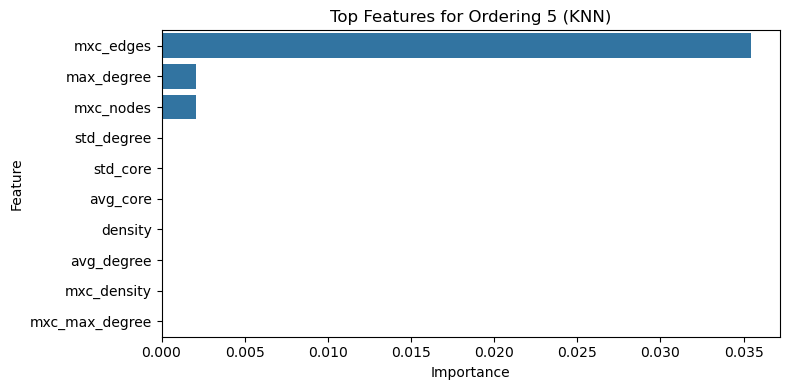


=== Feature Importance for l=6 (CatBoost) ===


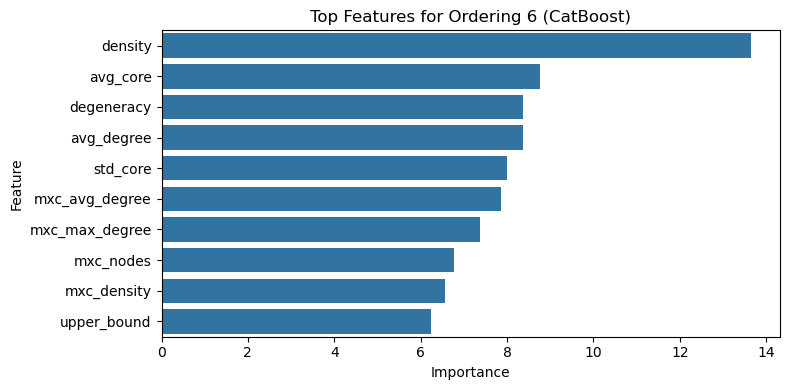


=== Feature Importance for l=7 (Decision Tree) ===


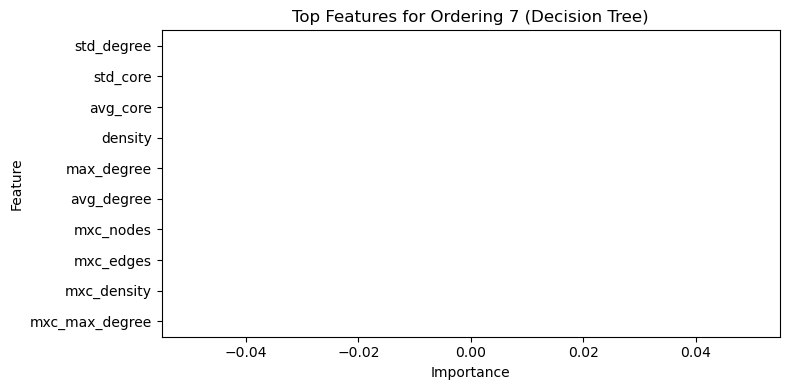


=== Feature Importance for l=8 (SVM) ===
SVM has no native feature_importances_. Using permutation importance.


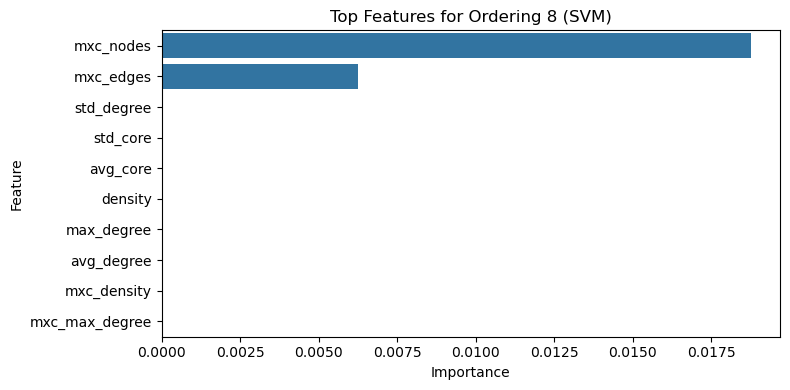

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Refit the best models on training data for consistent importance extraction
feature_importances = {}

for i, row in results_df.iterrows():
    ordering = row["Ordering (l)"]
    best_model_name = row["Best Model"]
    best_params = row["Best Params"]

    print(f"\n=== Feature Importance for l={ordering} ({best_model_name}) ===")

    # Recreate model with best params
    model = models[best_model_name].set_params(**best_params)
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    model.fit(X_train, y_train_bin)

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    else:
        print(f"{best_model_name} has no native feature_importances_. Using permutation importance.")
        result = permutation_importance(model, X_test, y_test_bin, n_repeats=10, random_state=42, n_jobs=12)
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": result.importances_mean
        }).sort_values(by="Importance", ascending=False)

    feature_importances[ordering] = importance_df

    # 🔹 Plot top features
    plt.figure(figsize=(8, 4))
    sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
    plt.title(f"Top Features for Ordering {ordering} ({best_model_name})")
    plt.tight_layout()
    plt.show()


=== Global Feature Importance (Averaged Across All Orderings) ===
                Importance
Feature                   
density           3.409394
avg_core          2.193558
degeneracy        2.093670
avg_degree        2.091655
std_core          1.998015
mxc_avg_degree    1.962541
mxc_max_degree    1.840631
mxc_nodes         1.700178
mxc_density       1.638678
upper_bound       1.561518
mxc_edges         1.547075
std_degree        1.496678
max_degree        1.482553


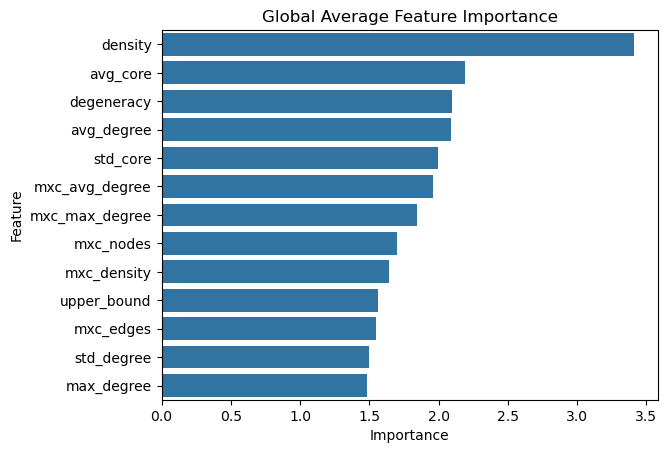

In [111]:
# Average normalized importances across orderings
global_importance = (
    pd.concat(feature_importances.values())
    .groupby("Feature")
    .mean()
    .sort_values("Importance", ascending=False)
)
print("\n=== Global Feature Importance (Averaged Across All Orderings) ===")
print(global_importance)
sns.barplot(x="Importance", y=global_importance.index, data=global_importance)
plt.title("Global Average Feature Importance")
plt.show()

# Added features (std_degree,std_core,node,density,...)

In [112]:
# giving class_weight = balanced
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12)
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train, y_train_bin)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })


Decision Tree Report for l=5:
              precision    recall  f1-score   support

           0     0.7297    0.7941    0.7606        34
           1     0.3636    0.2857    0.3200        14

    accuracy                         0.6458        48
   macro avg     0.5467    0.5399    0.5403        48
weighted avg     0.6230    0.6458    0.6321        48


Random Forest Report for l=5:
              precision    recall  f1-score   support

           0     0.7317    0.8824    0.8000        34
           1     0.4286    0.2143    0.2857        14

    accuracy                         0.6875        48
   macro avg     0.5801    0.5483    0.5429        48
weighted avg     0.6433    0.6875    0.6500        48


SVM Report for l=5:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        34
           1     0.2766    0.9286    0.4262        14

    accuracy                         0.2708        48
   macro avg     0.1383    0.4643    0.2131  

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Report for l=5:
              precision    recall  f1-score   support

           0     0.6250    0.1471    0.2381        34
           1     0.2750    0.7857    0.4074        14

    accuracy                         0.3333        48
   macro avg     0.4500    0.4664    0.3228        48
weighted avg     0.5229    0.3333    0.2875        48


KNN Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.9412    0.8205        34
           1     0.5000    0.1429    0.2222        14

    accuracy                         0.7083        48
   macro avg     0.6136    0.5420    0.5214        48
weighted avg     0.6610    0.7083    0.6460        48


CatBoost Report for l=5:
              precision    recall  f1-score   support

           0     0.7209    0.9118    0.8052        34
           1     0.4000    0.1429    0.2105        14

    accuracy                         0.6875        48
   macro avg     0.5605    0.5273    0.5079 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=6:
              precision    recall  f1-score   support

           0     0.7576    0.6757    0.7143        37
           1     0.2000    0.2727    0.2308        11

    accuracy                         0.5833        48
   macro avg     0.4788    0.4742    0.4725        48
weighted avg     0.6298    0.5833    0.6035        48


KNN Report for l=6:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=6:
              precision    recall  f1-score   support

           0     0.8140    0.9459    0.8750        37
           1     0.6000    0.2727    0.3750        11

    accuracy                         0.7917        48
   macro avg     0.7070    0.6093    0.6250 

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Logistic Regression Report for l=7:
              precision    recall  f1-score   support

           0     0.7586    0.5946    0.6667        37
           1     0.2105    0.3636    0.2667        11

    accuracy                         0.5417        48
   macro avg     0.4846    0.4791    0.4667        48
weighted avg     0.6330    0.5417    0.5750        48


KNN Report for l=7:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


CatBoost Report for l=7:
              precision    recall  f1-score   support

           0     0.7778    0.9459    0.8537        37
           1     0.3333    0.0909    0.1429        11

    accuracy                         0.7500        48
   macro avg     0.5556    0.5184    0.4983 

In [113]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l) Best Model  Accuracy  F1-score
0             5        KNN  0.708333  0.222222
1             6   CatBoost  0.791667  0.375000
2             7        SVM  0.770833  0.000000
3             8        SVM  0.729167  0.000000


In [114]:
#tuning
# ==========================
# Import Libraries
# ==========================
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from catboost import CatBoostClassifier

# ==================================
# Define Parameter Distributions
# ==================================
param_distributions = {
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 5, 10, 20,50],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 10),
        "max_features": [None, "sqrt", "log2"],
        "min_impurity_decrease": uniform(0.0, 0.05),
        "ccp_alpha": uniform(0.0, 0.05)
    },
    "Random Forest": {
        "n_estimators": randint(50, 300),
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": randint(2, 15),
        "min_samples_leaf": randint(1, 10),
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "SVM": {
        "C":loguniform(1e-3,1e2),
        "kernel": ["rbf", "poly","sigmoid"],  
#         "gamma": ["scale", "auto"]
    },
    "Linear SVM": {
        "C": loguniform(1e-3,1e2),
        "max_iter": randint(500, 1000)
    },
    "Logistic Regression": {
        "C": loguniform(1e-3,1e2),  
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": randint(1000, 3000)
    },
    "KNN": {
        "n_neighbors": randint(3, 10),
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "CatBoost": {
        "depth": randint(4, 10),
        "learning_rate": loguniform(1e-3, 1.0),
        "iterations": [200, 500, 1000],
        "l2_leaf_reg": [1, 3, 5, 7]
    }
}

# ==================================
# Define CV Strategy
# ==================================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)



In [115]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# ===============================================
# Force all numerical libraries to use 12 threads
# ===============================================
os.environ["OMP_NUM_THREADS"] = "12"
os.environ["OPENBLAS_NUM_THREADS"] = "12"
os.environ["MKL_NUM_THREADS"] = "12"
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"
os.environ["NUMEXPR_NUM_THREADS"] = "12"

# ===============================================
# Define all models
# ===============================================
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=5000, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=3000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12, random_seed=42)
}

  
# ===============================================
# Random Search Config
# ===============================================
n_iter_search = 20
best_models = []

# ===============================================
# Loop over labels and tune models
# ===============================================
for ordering in [5, 6, 7, 8]:
    print(f"\n--- Tuning models for ordering={ordering} ---")
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""
    best_params = {}

    for name, model in models.items():
        print(f"\n🔹 Tuning {name} ...")

        # Use parallel CPU where possible
        if name == "CatBoost":
            model.set_params(thread_count=12, verbose=0)
            n_jobs = 1  # CatBoost handles its own threading
        else:
            n_jobs = 12  # scikit-learn parallelism

        # Randomized Search CV
        random_search = RandomizedSearchCV(
            model,
            param_distributions.get(name, {}),
            n_iter=n_iter_search,
            scoring="accuracy",
            cv=cv,
            random_state=42,
            n_jobs=n_jobs,
            refit=True,
            verbose=1
        )

        random_search.fit(X_train, y_train_bin)
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        print(f"{name} (Best Params: {random_search.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        # Track best model
        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name
            best_params = random_search.best_params_

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Best Params": best_params,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

# ===============================================
# Show Best Results
# ===============================================
results_df = pd.DataFrame(best_models)
print("\n===== BEST MODELS SUMMARY =====")
print(results_df)



--- Tuning models for ordering=5 ---

🔹 Tuning Decision Tree ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree (Best Params: {'ccp_alpha': 0.0011531212520707879, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'min_impurity_decrease': 0.006974693032602092, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7059    0.7059    0.7059        34
           1     0.2857    0.2857    0.2857        14

    accuracy                         0.5833        48
   macro avg     0.4958    0.4958    0.4958        48
weighted avg     0.5833    0.5833    0.5833        48


🔹 Tuning Random Forest ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest (Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}) Report for l=5:
              precision

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anac

Logistic Regression (Best Params: {'C': 0.006026889128682512, 'max_iter': 1466, 'solver': 'saga'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7500    0.4412    0.5556        34
           1     0.3214    0.6429    0.4286        14

    accuracy                         0.5000        48
   macro avg     0.5357    0.5420    0.4921        48
weighted avg     0.6250    0.5000    0.5185        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=5:
              precision    recall  f1-score   support

           0     0.7273    0.9412    0.8205        34
           1     0.5000    0.1429    0.2222        14

    accuracy                         0.7083        48
   macro avg     0.6136    0.5420    0.5214        48
weighted avg     0.6610    0.7083    0.6460        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates, to

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest (Best Params: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}) Report for l=6:
              precision    recall  f1-score   support

           0     0.8788    0.7838    0.8286        37
           1     0.4667    0.6364    0.5385        11

    accuracy                         0.7500        48
   macro avg     0.6727    0.7101    0.6835        48
weighted avg     0.7843    0.7500    0.7621        48


🔹 Tuning SVM ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
SVM (Best Params: {'C': 0.19069966103000435, 'kernel': 'sigmoid'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        37
           1     0.2292    1.0000    0.3729        11

    accuracy                         0.2292        48
   macro avg     0.1146    0.5000    0.1864        48
weighted avg     0.0525    0.2292    0.0855        48


🔹 Tuning

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Logistic Regression (Best Params: {'C': 1.2229467525390603, 'max_iter': 2337, 'solver': 'liblinear'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.8235    0.3784    0.5185        37
           1     0.2581    0.7273    0.3810        11

    accuracy                         0.4583        48
   macro avg     0.5408    0.5528    0.4497        48
weighted avg     0.6939    0.4583    0.4870        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}) Report for l=6:
              precision    recall  f1-score   support

           0     0.7708    1.0000    0.8706        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7708        48
   macro avg     0.3854    0.5000    0.4353        48
weighted avg     0.5942    0.7708    0.6711        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates,

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest (Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7632    0.7838    0.7733        37
           1     0.2000    0.1818    0.1905        11

    accuracy                         0.6458        48
   macro avg     0.4816    0.4828    0.4819        48
weighted avg     0.6341    0.6458    0.6398        48


🔹 Tuning SVM ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
SVM (Best Params: {'C': 0.001267425589893723, 'kernel': 'poly'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7660    0.9730    0.8571        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7500        48
   macro avg     0.3830    0.4865    0.4286        48
weighted avg     0.5904    0.7500    0.6607        48


🔹 Tuning Line

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anac

Logistic Regression (Best Params: {'C': 0.19069966103000435, 'max_iter': 1686, 'solver': 'liblinear'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7660    0.9730    0.8571        37
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.7500        48
   macro avg     0.3830    0.4865    0.4286        48
weighted avg     0.5904    0.7500    0.6607        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=7:
              precision    recall  f1-score   support

           0     0.7826    0.9730    0.8675        37
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.7708        48
   macro avg     0.6413    0.5319    0.5107        48
weighted avg     0.7178    0.7708    0.7039        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates

/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0     0.7143    0.4167    0.5263        36
           1     0.2222    0.5000    0.3077        12

    accuracy                         0.4375        48
   macro avg     0.4683    0.4583    0.4170        48
weighted avg     0.5913    0.4375    0.4717        48


🔹 Tuning Logistic Regression ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ara2/anaconda3/envs/py39env/lib/python3.9/site-packages/sklearn/lin

Logistic Regression (Best Params: {'C': 4.5705630998014515, 'max_iter': 2724, 'solver': 'lbfgs'}) Report for l=8:
              precision    recall  f1-score   support

           0     0.7381    0.8611    0.7949        36
           1     0.1667    0.0833    0.1111        12

    accuracy                         0.6667        48
   macro avg     0.4524    0.4722    0.4530        48
weighted avg     0.5952    0.6667    0.6239        48


🔹 Tuning KNN ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN (Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}) Report for l=8:
              precision    recall  f1-score   support

           0     0.7447    0.9722    0.8434        36
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.7292        48
   macro avg     0.3723    0.4861    0.4217        48
weighted avg     0.5585    0.7292    0.6325        48


🔹 Tuning CatBoost ...
Fitting 3 folds for each of 20 candidates, tot

In [116]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

   Ordering (l)     Best Model  \
0             5            KNN   
1             6       CatBoost   
2             7  Decision Tree   
3             8            SVM   

                                         Best Params  Accuracy  F1-score  
0   {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}  0.708333  0.222222  
1  {'depth': 8, 'iterations': 200, 'l2_leaf_reg':...  0.791667  0.166667  
2  {'ccp_alpha': 0.016259166101337354, 'criterion...  0.770833  0.000000  
3        {'C': 0.9643857615941438, 'kernel': 'poly'}  0.750000  0.000000  



=== Feature Importance for l=5 (KNN) ===
KNN has no native feature_importances_. Using permutation importance.


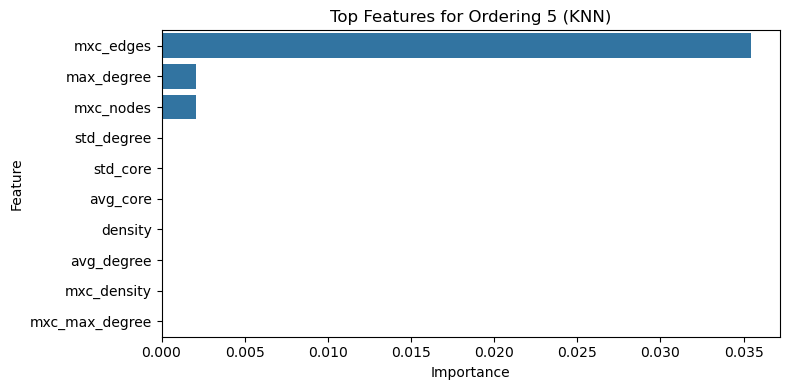


=== Feature Importance for l=6 (CatBoost) ===


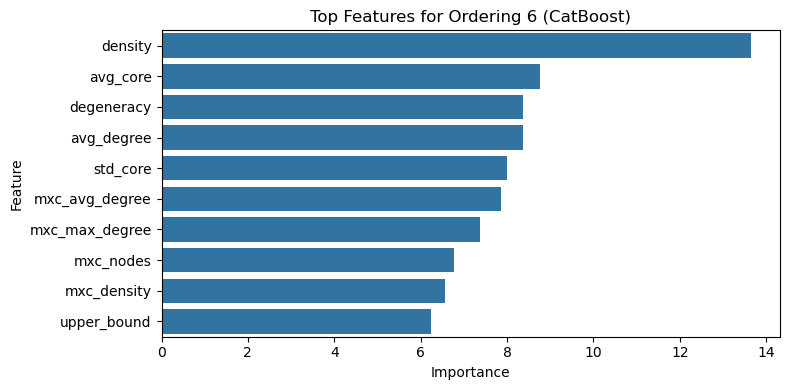


=== Feature Importance for l=7 (Decision Tree) ===


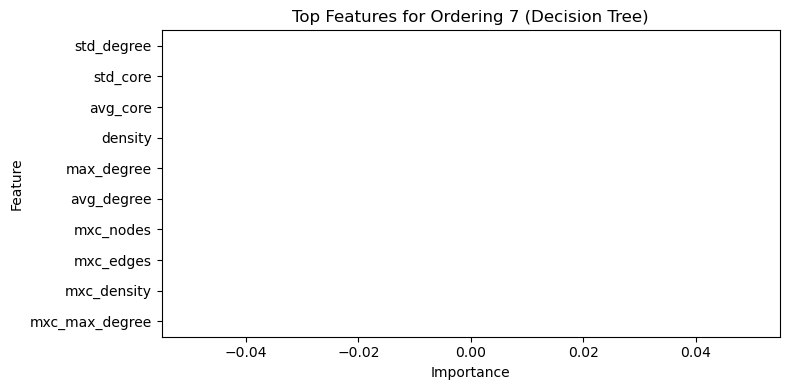


=== Feature Importance for l=8 (SVM) ===
SVM has no native feature_importances_. Using permutation importance.


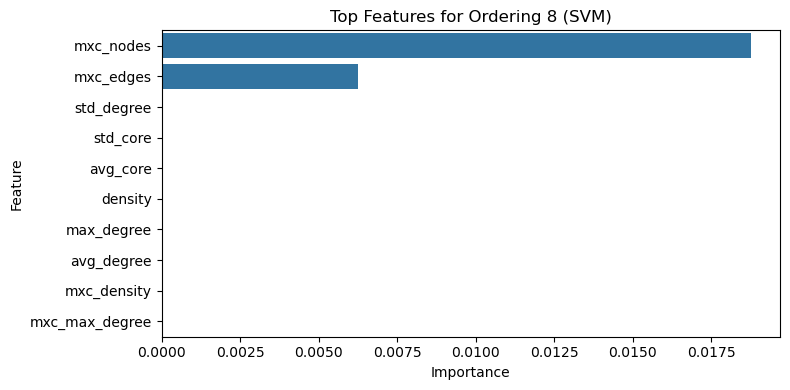

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Refit the best models on training data for consistent importance extraction
feature_importances = {}

for i, row in results_df.iterrows():
    ordering = row["Ordering (l)"]
    best_model_name = row["Best Model"]
    best_params = row["Best Params"]

    print(f"\n=== Feature Importance for l={ordering} ({best_model_name}) ===")

    # Recreate model with best params
    model = models[best_model_name].set_params(**best_params)
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    model.fit(X_train, y_train_bin)

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    else:
        print(f"{best_model_name} has no native feature_importances_. Using permutation importance.")
        result = permutation_importance(model, X_test, y_test_bin, n_repeats=10, random_state=42, n_jobs=12)
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": result.importances_mean
        }).sort_values(by="Importance", ascending=False)

    feature_importances[ordering] = importance_df

    # 🔹 Plot top features
    plt.figure(figsize=(8, 4))
    sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
    plt.title(f"Top Features for Ordering {ordering} ({best_model_name})")
    plt.tight_layout()
    plt.show()


=== Global Feature Importance (Averaged Across All Orderings) ===
                Importance
Feature                   
density           3.409394
avg_core          2.193558
degeneracy        2.093670
avg_degree        2.091655
std_core          1.998015
mxc_avg_degree    1.962541
mxc_max_degree    1.840631
mxc_nodes         1.700178
mxc_density       1.638678
upper_bound       1.561518
mxc_edges         1.547075
std_degree        1.496678
max_degree        1.482553


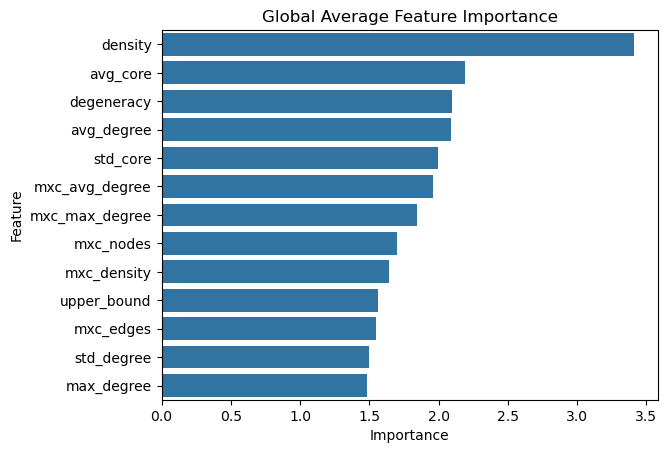

In [118]:
# Average normalized importances across orderings
global_importance = (
    pd.concat(feature_importances.values())
    .groupby("Feature")
    .mean()
    .sort_values("Importance", ascending=False)
)
print("\n=== Global Feature Importance (Averaged Across All Orderings) ===")
print(global_importance)
sns.barplot(x="Importance", y=global_importance.index, data=global_importance)
plt.title("Global Average Feature Importance")
plt.show()

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

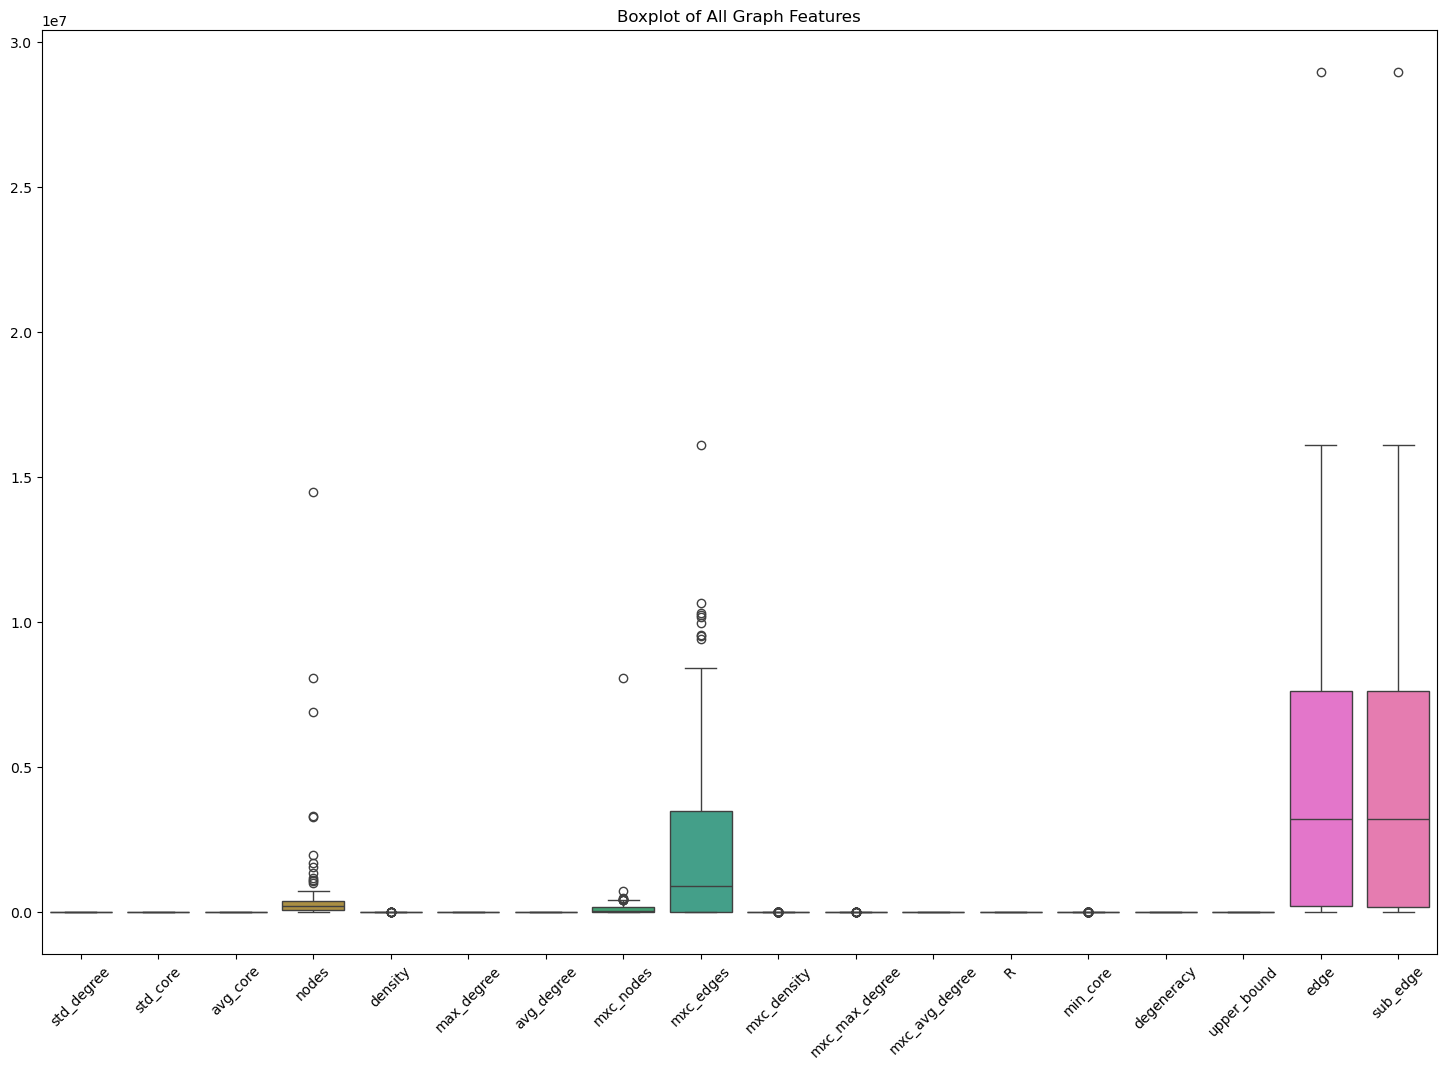

In [120]:
features_df = df[['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
                'degeneracy', 'upper_bound', 'edge', 'sub_edge']]
plt.figure(figsize=(18, 12))
sns.boxplot(data=features_df)
plt.xticks(rotation=45)
plt.title("Boxplot of All Graph Features")
plt.show()

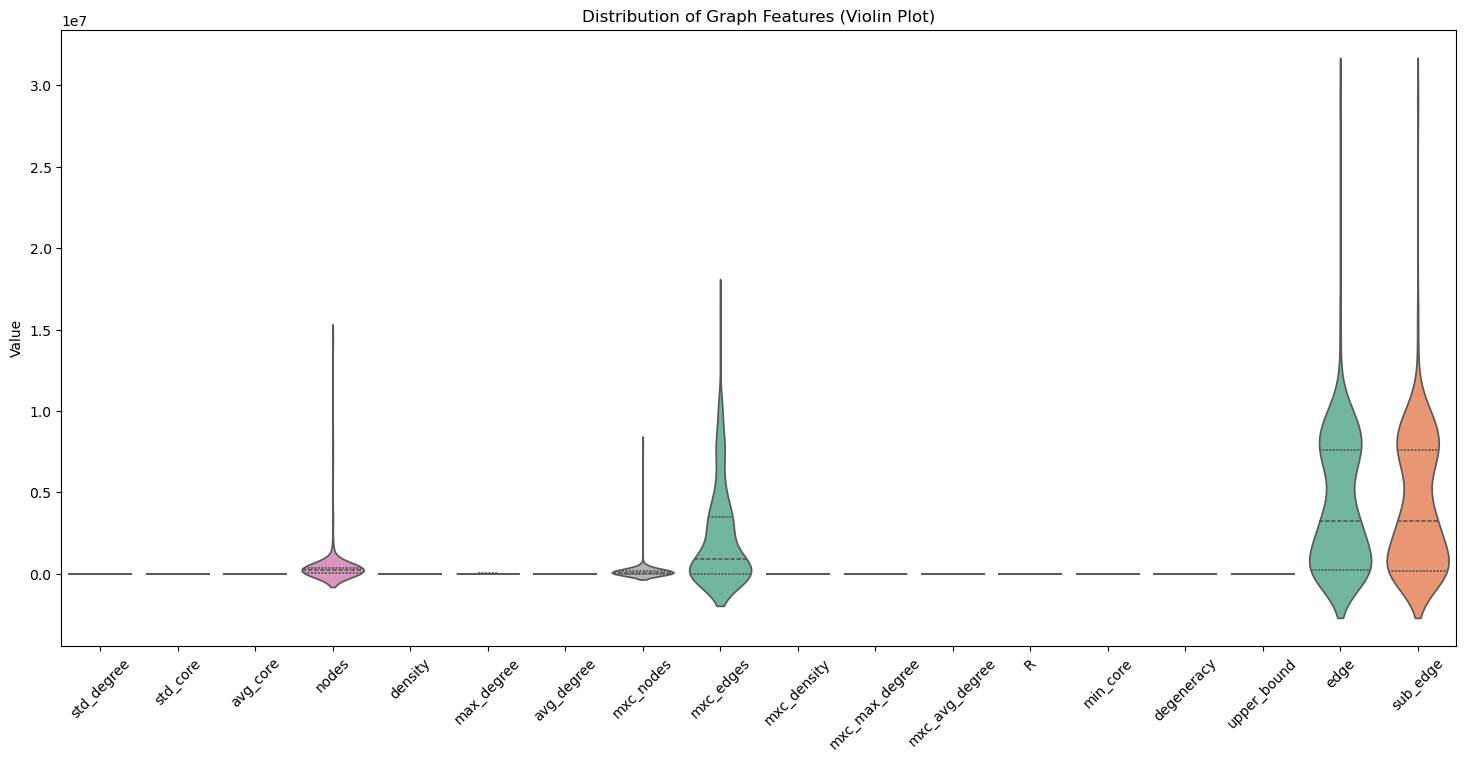

In [121]:
plt.figure(figsize=(18, 8))
sns.violinplot(data=features_df, palette="Set2", inner="quartile") 
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.title("Distribution of Graph Features (Violin Plot)")
plt.show()

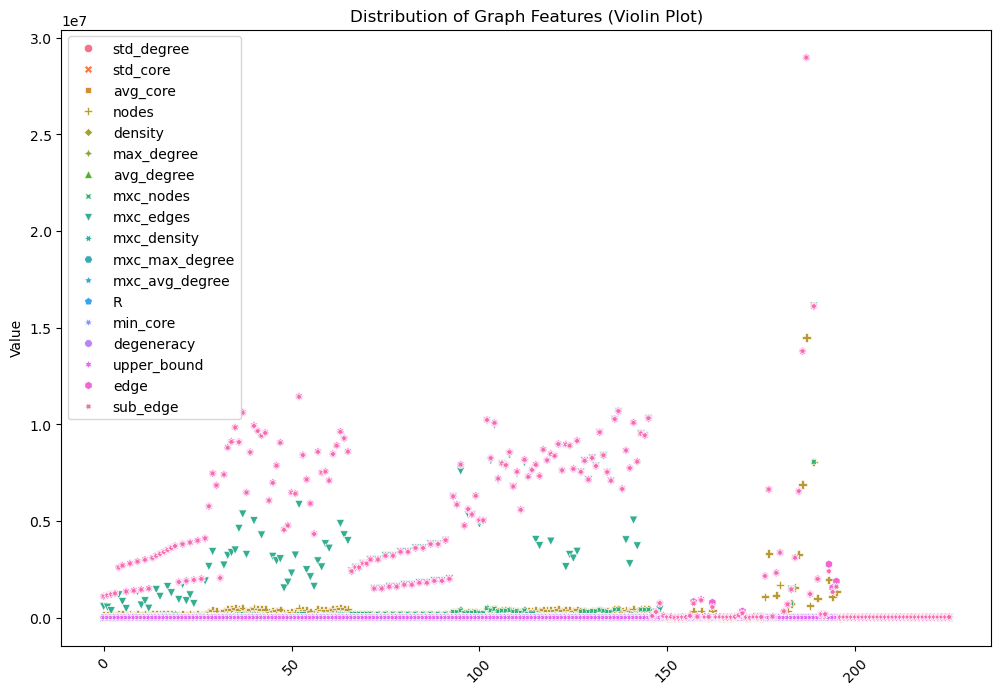

In [122]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=features_df) 
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.title("Distribution of Graph Features (Violin Plot)")
plt.show()

# EDA

In [124]:
from sklearn.preprocessing import StandardScaler

count_features = [ 'edge', 'mxc_nodes', 'mxc_edges']
# features_df[count_features] = features_df[count_features].apply(lambda x: np.log1p(x))


# Step 1: Log-transform training features
X_train_log = X_train.copy()
X_train_log[count_features] = X_train_log[count_features].apply(np.log1p)

# Step 2: Standardize training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Step 3: Apply SAME transformations to test set
X_test_log = X_test.copy()
X_test_log[count_features] = X_test_log[count_features].apply(np.log1p)
X_test_scaled = scaler.transform(X_test_log)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

KeyError: "['edge'] not in index"

In [ ]:
X_train_scaled_df.head()

In [ ]:
X_test_scaled_df.head()

In [ ]:
# giving class_weight = balanced
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train_scaled_df, y_train_bin)
        y_pred = model.predict(X_test_scaled_df)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

In [ ]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

In [ ]:
#tuning
# ==========================
# Import Libraries
# ==========================
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from catboost import CatBoostClassifier

# ==================================
# Define Parameter Distributions
# ==================================
param_distributions = {
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 5, 10, 20,50],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 10),
        "max_features": [None, "sqrt", "log2"],
        "min_impurity_decrease": uniform(0.0, 0.05),
        "ccp_alpha": uniform(0.0, 0.05)
    },
    "Random Forest": {
        "n_estimators": randint(50, 300),
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": randint(2, 15),
        "min_samples_leaf": randint(1, 10),
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "SVM": {
        "C":loguniform(1e-3,1e2),
        "kernel": ["rbf", "poly","sigmoid"],  
#         "gamma": ["scale", "auto"]
    },
    "Linear SVM": {
        "C": loguniform(1e-3,1e2),
        "max_iter": randint(500, 1000)
    },
    "Logistic Regression": {
        "C": loguniform(1e-3,1e2),  
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": randint(1000, 3000)
    },
    "KNN": {
        "n_neighbors": randint(3, 10),
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "CatBoost": {
        "depth": randint(4, 10),
        "learning_rate": loguniform(1e-3, 1.0),
        "iterations": [200, 500, 1000],
        "l2_leaf_reg": [1, 3, 5, 7]
    }
}

# ==================================
# Define CV Strategy
# ==================================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)



In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# ===============================================
# Force all numerical libraries to use 12 threads
# ===============================================
os.environ["OMP_NUM_THREADS"] = "12"
os.environ["OPENBLAS_NUM_THREADS"] = "12"
os.environ["MKL_NUM_THREADS"] = "12"
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"
os.environ["NUMEXPR_NUM_THREADS"] = "12"

# ===============================================
# Define all models
# ===============================================
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=5000, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=3000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, thread_count=12, random_seed=42)
}

  
# ===============================================
# Random Search Config
# ===============================================
n_iter_search = 20
best_models = []

# ===============================================
# Loop over labels and tune models
# ===============================================
for ordering in [5, 6, 7, 8]:
    print(f"\n--- Tuning models for ordering={ordering} ---")
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""
    best_params = {}

    for name, model in models.items():
        print(f"\n🔹 Tuning {name} ...")

        # Use parallel CPU where possible
        if name == "CatBoost":
            model.set_params(thread_count=12, verbose=0)
            n_jobs = 1  # CatBoost handles its own threading
        else:
            n_jobs = 12  # scikit-learn parallelism

        # Randomized Search CV
        random_search = RandomizedSearchCV(
            model,
            param_distributions.get(name, {}),
            n_iter=n_iter_search,
            scoring="accuracy",
            cv=cv,
            random_state=42,
            n_jobs=n_jobs,
            refit=True,
            verbose=1
        )

        random_search.fit(X_train, y_train_bin)
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        print(f"{name} (Best Params: {random_search.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        # Track best model
        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name
            best_params = random_search.best_params_

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Best Params": best_params,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

In [ ]:

# ===============================================
# Show Best Results
# ===============================================
results_df = pd.DataFrame(best_models)
print("\n===== BEST MODELS SUMMARY =====")
print(results_df)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Refit the best models on training data for consistent importance extraction
feature_importances = {}

for i, row in results_df.iterrows():
    ordering = row["Ordering (l)"]
    best_model_name = row["Best Model"]
    best_params = row["Best Params"]

    print(f"\n=== Feature Importance for l={ordering} ({best_model_name}) ===")

    # Recreate model with best params
    model = models[best_model_name].set_params(**best_params)
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)
    model.fit(X_train, y_train_bin)

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

    else:
        print(f"{best_model_name} has no native feature_importances_. Using permutation importance.")
        result = permutation_importance(model, X_test, y_test_bin, n_repeats=10, random_state=42, n_jobs=12)
        importance_df = pd.DataFrame({
            "Feature": feature_cols,
            "Importance": result.importances_mean
        }).sort_values(by="Importance", ascending=False)

    feature_importances[ordering] = importance_df

    # 🔹 Plot top features
    plt.figure(figsize=(8, 4))
    sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
    plt.title(f"Top Features for Ordering {ordering} ({best_model_name})")
    plt.tight_layout()
    plt.show()

In [ ]:
# Average normalized importances across orderings
global_importance = (
    pd.concat(feature_importances.values())
    .groupby("Feature")
    .mean()
    .sort_values("Importance", ascending=False)
)
print("\n=== Global Feature Importance (Averaged Across All Orderings) ===")
print(global_importance)
sns.barplot(x="Importance", y=global_importance.index, data=global_importance)
plt.title("Global Average Feature Importance")
plt.show()

In [ ]:
#tuning
# ==========================
# Import Libraries
# ==========================
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
# ==================================
# Define Parameter Distributions
# ==================================
param_distributions = {
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 5, 10, 20,50],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 10),
        "max_features": [None, "sqrt", "log2"],
        "min_impurity_decrease": uniform(0.0, 0.05),
        "ccp_alpha": uniform(0.0, 0.05)
    },
    "Random Forest": {
        "n_estimators": randint(50, 300),
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": randint(2, 15),
        "min_samples_leaf": randint(1, 10),
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "SVM": {
        "C":loguniform(1e-3,1e2),
        "kernel": ["rbf", "poly","sigmoid"],  
#         "gamma": ["scale", "auto"]
    },
    "Linear SVM": {
        "C": loguniform(1e-3,1e2),
        "max_iter": randint(500, 1000)
    },
    "Logistic Regression": {
        "C": loguniform(1e-3,1e2),  
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": randint(1000, 3000)
    },
    "KNN": {
        "n_neighbors": randint(3, 10),
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },

}

# ==================================
# Define CV Strategy
# ==================================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)



In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import uniform, randint, loguniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# ===============================================
# Force all numerical libraries to use 12 threads
# ===============================================
os.environ["OMP_NUM_THREADS"] = "12"
os.environ["OPENBLAS_NUM_THREADS"] = "12"
os.environ["MKL_NUM_THREADS"] = "12"
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"
os.environ["NUMEXPR_NUM_THREADS"] = "12"

# ===============================================
# Define all models
# ===============================================
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=12),
    "SVM": SVC(class_weight='balanced',probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced',max_iter=5000, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=3000, random_state=42),
    "KNN": KNeighborsClassifier(),
}

  
# ===============================================
# Random Search Config
# ===============================================
n_iter_search = 20
best_models = []

# ===============================================
# Loop over labels and tune models
# ===============================================
for ordering in [5, 6, 7, 8]:
    print(f"\n--- Tuning models for ordering={ordering} ---")
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""
    best_params = {}

    for name, model in models.items():
        print(f"\n🔹 Tuning {name} ...")

        # Use parallel CPU where possible
        if name == "CatBoost":
            model.set_params(thread_count=12, verbose=0)
            n_jobs = 1  # CatBoost handles its own threading
        else:
            n_jobs = 12  # scikit-learn parallelism

        # Randomized Search CV
        random_search = RandomizedSearchCV(
            model,
            param_distributions.get(name, {}),
            n_iter=n_iter_search,
            scoring="accuracy",
            cv=cv,
            random_state=42,
            n_jobs=n_jobs,
            refit=True,
            verbose=1
        )

        random_search.fit(X_train, y_train_bin)
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        print(f"{name} (Best Params: {random_search.best_params_}) Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        # Track best model
        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name
            best_params = random_search.best_params_

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Best Params": best_params,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })

# ===============================================
# Show Best Results
# ===============================================
results_df = pd.DataFrame(best_models)
print("\n===== BEST MODELS SUMMARY =====")
print(results_df)


In [ ]:
summary_df = pd.DataFrame(best_models)
print(summary_df)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define best models with their tuned parameters

# best_models_params = {
#     5: LogisticRegression(C=0.0745934328572655, max_iter=1860, class_weight='balanced'),
#     6: KNeighborsClassifier(n_neighbors=6, p=1, weights='uniform'),
#     7: DecisionTreeClassifier(ccp_alpha=0.049161544290339414, criterion='gini', class_weight='balanced'),
#     8: KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
# }

# summary = []

# for ordering, model in best_models_params.items():
#     # Binary target for this ordering
#     y_train_bin = (y_train == ordering).astype(int)
#     y_test_bin = (y_test == ordering).astype(int)

#     # Train
#     model.fit(X_train_scaled_df, y_train_bin)
#     y_pred = model.predict(X_test_scaled_df)

#     # Metrics
#     acc = accuracy_score(y_test_bin, y_pred)
#     f1 = f1_score(y_test_bin, y_pred)
    
#     print(f"\nModel Report for l={ordering} ({type(model).__name__}):")
#     print(classification_report(y_test_bin, y_pred, digits=4))
    
#     summary.append({
#         "Ordering (l)": ordering,
#         "Model": type(model).__name__,
#         "Accuracy": acc,
#         "F1-score": f1
#     })
# giving class_weight = balanced
from sklearn.metrics import accuracy_score, f1_score
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(ccp_alpha=0.049161544290339414, criterion='gini', class_weight='balanced'),
    "Logistic Regression": LogisticRegression(C=0.0745934328572655, max_iter=1860, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=6, p=1, weights='uniform'),
    "KNN": KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
}

best_models = []  # list, not dict

for ordering in [5, 6, 7, 8]:
    y_train_bin = (y_train == ordering).astype(int)
    y_test_bin = (y_test == ordering).astype(int)

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        model.fit(X_train_scaled_df, y_train_bin)
        y_pred = model.predict(X_test_scaled_df)

        acc = accuracy_score(y_test_bin, y_pred)
        f1 = f1_score(y_test_bin, y_pred)

        # Print classification report for this model
        print(f"\n{name} Report for l={ordering}:")
        print(classification_report(y_test_bin, y_pred, digits=4))

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })


In [ ]:
summary_df = pd.DataFrame(summary)
print("\n=== Summary ===")
print(summary_df)

# Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# ---------------- Models ----------------
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_jobs=12),
    "SVM": SVC(class_weight='balanced', probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced', max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
}

best_models = []

# ---------------- Cross Validation Setup ----------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------- Loop through each label ----------------
for ordering in [5, 6, 7, 8]:
    y_bin = (y_train == ordering).astype(int)   # binary target for this label

    best_acc = 0
    best_f1 = 0
    best_model_name = ""

    for name, model in models.items():
        # Accuracy via cross-validation
        acc_scores = cross_val_score(model, X_train_scaled_df, y_bin, cv=cv, scoring='accuracy', n_jobs=12)
#         f1_scores = cross_val_score(model, X_train_scaled_df, y_bin, cv=cv, scoring=make_scorer(f1_score), n_jobs=12)
        f1_macro_scorer = make_scorer(f1_score, average='macro')
        f1_scores = cross_val_score(model, X_train_scaled_df, y_bin, cv=cv, scoring=f1_macro_scorer, n_jobs=12)

        acc_mean = np.mean(acc_scores)
        f1_mean = np.mean(f1_scores)

        print(f"\n{name} (l={ordering}) Cross-Validation Results:")
        print(f"  Accuracy: {acc_mean:.4f} (+/- {np.std(acc_scores):.4f})")
        print(f"  F1-score: {f1_mean:.4f} (+/- {np.std(f1_scores):.4f})")

        if acc_mean > best_acc:
            best_acc = acc_mean
            best_f1 = f1_mean
            best_model_name = name

    best_models.append({
        "Ordering (l)": ordering,
        "Best Model": best_model_name,
        "Accuracy": best_acc,
        "F1-score": best_f1
    })


In [ ]:
# ---------------- Summary ----------------
results_df = pd.DataFrame(best_models)
print("\n=== Best Models Summary ===")
print(results_df)

# Changing the presentation of real: train-test split

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Loading dataset
file_path = "/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
df = pd.read_csv(file_path)
df.tail()

In [ ]:
df_class = df.copy()

def best_ordering(row):
    subset = {f"l={i}": row[f"time_{i}"] for i in range(5,9)}
    print(subset)
    return min(subset, key=subset.get).replace("l=","")
df_class["best_label"] = df_class.apply(best_ordering, axis=1).astype(int)

In [ ]:
counts = df_class["best_label"].value_counts()
print(counts)

In [ ]:
synthetic_df = df_class.loc[:145]

In [ ]:
real_df = df_class.loc[146:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
real_train, real_test = train_test_split(
        real_df,
        test_size=0.4,
        random_state = 20,
        stratify = real_df['best_label']
)

In [ ]:
len(real_test)

In [ ]:
len(real_train)

In [ ]:
synthetic_train, synthetic_test = train_test_split(
        synthetic_df,
        test_size = 0.20,
        random_state=20,
        stratify=synthetic_df['best_label']
)

In [ ]:
len(synthetic_train)

In [ ]:
len(synthetic_test)

In [ ]:
train_df = pd.concat([synthetic_train,real_train], ignore_index=True)
test_df = pd.concat([synthetic_test, real_test], ignore_index=True)

In [ ]:
print(len(train_df)) #72%
print(len(test_df)) # 28%

In [ ]:
print(train_df['best_label'].value_counts(normalize=True))
print(test_df['best_label'].value_counts(normalize=True))

In [ ]:
train_df.head()

In [ ]:
feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_std_degree','mxc_nodes', 'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound', 'edge', 'sub_edge']

X_train = train_df[feature_cols]
y_train = train_df['best_label']

X_test = test_df[feature_cols]
y_test = test_df['best_label']

In [ ]:
X_train.head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score, precision_score, recall_score, roc_auc_score,
    make_scorer, classification_report
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# ---------------- Models ----------------
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_jobs=12),
    "SVM": SVC(class_weight='balanced', probability=True),
    "Linear SVM": LinearSVC(class_weight='balanced', max_iter=3000),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=50000, n_jobs=12),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=12),
}

all_results = []

# ---------------- Cross Validation ----------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------- Loop through each label ----------------
for ordering in [5, 6, 7, 8]:
    y_bin = (y_train == ordering).astype(int)  # binary target for this label
    
    print(f"\n==== Evaluating label l={ordering} ====")
    
    for name, model in models.items():
        # Scorers
        f1_macro_scorer = make_scorer(f1_score, average='macro')
        precision_macro_scorer = make_scorer(precision_score, average='macro')
        recall_macro_scorer = make_scorer(recall_score, average='macro')
        
        # Cross-validation
        acc_scores = cross_val_score(model, X_train_scaled, y_bin, cv=cv, scoring='accuracy', n_jobs=12)
        f1_scores = cross_val_score(model, X_train_scaled, y_bin, cv=cv, scoring=f1_macro_scorer, n_jobs=12)
        precision_scores = cross_val_score(model, X_train_scaled, y_bin, cv=cv, scoring=precision_macro_scorer, n_jobs=12)
        recall_scores = cross_val_score(model, X_train_scaled, y_bin, cv=cv, scoring=recall_macro_scorer, n_jobs=12)
        
        # ROC-AUC if available
        try:
            auc_scores = cross_val_score(model, X_train, y_bin, cv=cv, scoring='roc_auc', n_jobs=12)
            auc_mean = np.mean(auc_scores)
        except:
            auc_mean = np.nan
        
        
        # Store all metrics
        all_results.append({
            "Ordering (l)": ordering,
            "Model": name,
            "Accuracy": np.mean(acc_scores),
            "F1-score": np.mean(f1_scores),
            "Precision": np.mean(precision_scores),
            "Recall": np.mean(recall_scores),
            "ROC-AUC": auc_mean,
        })

# ---------------- Summary ----------------
summary_df = pd.DataFrame(all_results)
print("\n=== All Models Metrics Summary ===")
print(summary_df)


In [ ]:
print(summary_df)

In [ ]:
summary_df.to_csv("/home/ara2/PCE-Test/model_metrics_summary.csv", index=False)

In [ ]:
feature_matrix_with_best_label = pd.concat([train_df, test_df], ignore_index=False)

In [ ]:
feature_matrix_with_best_label.to_csv("/home/ara2/Desktop/Najifa_Arif_CSE491/feature_matrix_with_best_label.csv", index=False)